In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def step_fun(x):
    return np.array(x > 0, dtype=np.float)

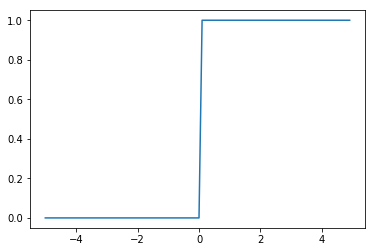

In [4]:
X = np.arange(-5.0, 5.0, 0.1)
y = step_fun(X)
#print(X)
#print(y)
plt.plot(X, y)
#plt.ylim(-0.1, 1.1)
plt.show()

In [5]:
def relu(X):
    return np.maximum(0, X)

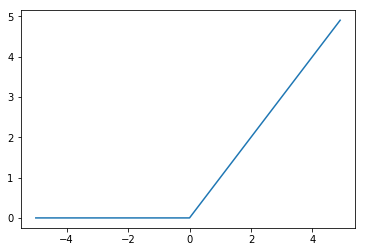

In [6]:
X = np.arange(-5.0, 5.0, 0.1)
y = relu(X)
plt.plot(X, y)
plt.show()

In [7]:
def initNetwork():
    network = {}
    # 注意，b的个数和W的维度要保持一致
    network["W1"] = np.array([[0.1,0.3,0.5], [0.2,0.4,.6]])
    network["b1"] = np.array([[0.1, 0.2, 0.3]])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["b2"] = np.array([[0.1, 0.2]])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["b3"] = np.array([[0.1, 0.2]])
    
    return network

In [8]:
def identity_function(x):
    return x

In [9]:
def sigmod(X):
    return 1 /(1 + np.exp(-X))

In [10]:
def forward(network, X):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(X, W1) + b1
    Z1 = sigmod(a1)
    a2 = np.dot(Z1, W2) + b2
    Z2 = sigmod(a2)
    a3 = np.dot(Z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [11]:
network = initNetwork()
X = np.array([1.0, 0.5])
y = forward(network, X)
print(y)

[[0.31682708 0.69627909]]


In [12]:
def softmax(X):
    c = np.max(X)
    exp_a = np.exp(X -c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    
    return y

In [13]:
a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [32]:
from PIL import Image
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [33]:
import sys, os
sys.path.append("D:\\practicespace\\github\\DeepLearning") # 为了导入父目录中的文件而进行的设定
from dataset.mnist import load_mnist
# 第一次调用会花费几分钟……
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
normalize=False)

img = x_train[0]
label = t_train[0]
print("label is: ", label)
img_reshape = img.reshape(28, 28)

img_show(img_reshape)


label is:  5


### 构建一个神经网络                                                                 

In [52]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f, encoding="iso-8859-1")
    return network

def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    a1 = np.dot(x, W1) + b1
    Z1 = sigmod(a1)
    a2 = np.dot(Z1, W2) + b2
    Z2 = sigmod(a2)
    a3 = np.dot(Z2, W3) + b3
    y = softmax(a3)
    
    return y

In [60]:
x_test, t_test = get_data()
network = init_network()
print(network)
accurate_count = 0
for i in range(len(x_test)):
    y = predict(network, x_test[i])
    print("orig: ", y)
    y = np.argmax(y)
    print("y: ", y)
    if(y == t_test[i]):
        accurate_count += 1
        
ratio = accurate_count / len(t_test)

print("ratio: ", ratio)

{'W2': array([[-0.10694039,  0.01591247, -0.44349867, ...,  0.03561032,
         0.14045963,  0.03964241],
       [ 0.29911557, -0.03322235, -0.08902215, ..., -0.04722451,
        -0.0972147 ,  0.2950258 ],
       [ 0.06576645,  0.6330455 ,  0.02325344, ...,  0.05046809,
         0.26831996, -0.13252524],
       ...,
       [-0.1839421 , -0.10925075,  0.25180233, ...,  0.06017017,
         0.11689074,  0.28868544],
       [ 0.10001627,  0.0899286 , -0.03874066, ...,  0.15217757,
        -0.05744234, -0.00713823],
       [-0.02220659, -0.05105179,  0.00777963, ..., -0.531206  ,
        -0.4042084 ,  0.0090801 ]], dtype=float32), 'b1': array([-0.06750315,  0.0695926 , -0.02730473,  0.02256093, -0.22001474,
       -0.22038847,  0.04862635,  0.13499236,  0.23342554, -0.0487357 ,
        0.10170191, -0.03076038,  0.15482435,  0.05212503,  0.06017235,
       -0.03364862, -0.11218343, -0.26460695, -0.03323386,  0.13610415,
        0.06354368,  0.04679805, -0.01621654, -0.05775835, -0.03108677

d:\software\develop\python\python35\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


orig:  [3.7754893e-05 3.6920401e-06 3.8244554e-03 3.4003858e-07 1.4834794e-04
 4.0443483e-05 9.9594021e-01 3.0528864e-07 4.3467530e-06 2.1365196e-08]
y:  6
orig:  [9.9861634e-01 9.7913244e-10 6.2954256e-05 2.2107356e-06 2.5376828e-08
 1.3053197e-03 4.3485184e-06 1.7271694e-06 6.6218709e-06 4.1909382e-07]
y:  0
orig:  [1.1558378e-04 9.7048360e-06 1.8273015e-07 4.2319433e-03 7.4612367e-06
 9.9377912e-01 2.4997530e-07 8.1958715e-04 2.1103308e-04 8.2526723e-04]
y:  5
orig:  [8.3465284e-06 3.8788414e-07 1.4517599e-04 9.7730981e-07 9.9424571e-01
 3.2297550e-05 5.1247557e-03 4.3717217e-05 2.8166232e-05 3.7052002e-04]
y:  4
orig:  [1.4488321e-06 1.6920449e-06 4.0241771e-06 9.4369971e-05 6.2377984e-03
 1.6002751e-04 8.5986551e-07 1.4832964e-04 7.7859982e-04 9.9257278e-01]
y:  9
orig:  [4.3419928e-07 5.0920426e-07 1.6440332e-05 2.1234386e-05 2.8672260e-03
 2.2632735e-06 2.9653532e-07 3.2547809e-04 3.4469523e-04 9.9642146e-01]
y:  9
orig:  [9.4709365e-04 8.5946986e-06 9.9682057e-01 1.6355503e-03 

orig:  [6.8195857e-04 7.2027046e-06 1.4713281e-06 3.6701525e-04 7.8949088e-06
 9.6788186e-01 1.9861689e-06 1.2653648e-05 2.9677136e-02 1.3608515e-03]
y:  5
orig:  [9.9744546e-01 6.5744521e-09 4.4920135e-04 1.7029033e-05 9.0894368e-08
 2.0136868e-03 5.7497331e-05 8.7708241e-07 1.5787777e-05 3.1927760e-07]
y:  0
orig:  [7.4427684e-05 3.9471796e-04 1.6903160e-03 3.4312438e-02 3.4626006e-04
 5.0748112e-03 5.8797275e-04 1.0718312e-06 9.5695466e-01 5.6335219e-04]
y:  8
orig:  [1.0407773e-06 8.8164796e-08 4.3172026e-06 5.9563481e-06 3.2536145e-03
 1.3028503e-06 2.8094917e-07 7.1133283e-04 3.7996513e-05 9.9598408e-01]
y:  9
orig:  [2.5255626e-04 7.0932892e-04 8.4722519e-01 1.5121280e-01 2.1683217e-09
 1.8291041e-04 3.4908964e-05 6.1669361e-06 3.7600944e-04 5.7943279e-08]
y:  2
orig:  [9.9453086e-04 1.7398552e-05 1.7636357e-05 1.3301713e-02 1.6210197e-05
 9.5501053e-01 3.8743451e-06 3.1192740e-05 2.7199581e-02 3.4073743e-03]
y:  5
orig:  [9.9896765e-01 6.5308992e-10 5.7911711e-05 2.4298940e-06 

orig:  [1.2975658e-11 9.9930358e-01 1.4996536e-05 4.2699648e-05 5.7503476e-06
 8.2233819e-06 7.0507831e-06 5.7055322e-06 6.0517027e-04 6.9676948e-06]
y:  1
orig:  [3.4420926e-05 8.0571634e-05 9.0064788e-01 3.3095881e-02 1.4078582e-04
 2.1816804e-05 1.6991089e-05 4.9194049e-02 1.1691524e-02 5.0760047e-03]
y:  2
orig:  [1.5950495e-07 3.5947742e-05 4.7300793e-05 4.7854752e-05 9.4377351e-01
 3.9985572e-04 3.4307136e-04 8.0768725e-05 3.5936825e-02 1.9334711e-02]
y:  4
orig:  [9.6865618e-01 1.2796414e-07 2.0772566e-03 3.7401405e-05 1.2892524e-07
 2.8622296e-02 8.0643469e-05 1.5304565e-06 5.2402145e-04 4.9341185e-07]
y:  0
orig:  [3.3091033e-05 4.4823202e-04 9.8902929e-01 9.0670865e-03 2.4383921e-08
 2.4188779e-05 3.7917774e-04 2.2343202e-07 1.0187767e-03 5.7134724e-08]
y:  2
orig:  [2.3454250e-07 1.2629406e-04 5.2331393e-03 2.6886369e-04 7.5981306e-04
 2.1826422e-06 2.4644930e-07 4.4722542e-01 1.7379394e-03 5.4464585e-01]
y:  9
orig:  [8.8580344e-07 1.1198059e-05 2.4810751e-04 2.7253656e-05 

orig:  [3.8858765e-09 2.4495817e-05 3.6675212e-07 2.6788362e-05 8.8467771e-01
 7.1096081e-05 1.4331190e-05 1.4396537e-04 2.9270988e-04 1.1474846e-01]
y:  4
orig:  [4.0605290e-11 9.9935681e-01 2.6995333e-05 8.9858295e-05 9.6034159e-07
 7.1742429e-06 3.4930506e-06 1.0125026e-05 4.9273396e-04 1.1799597e-05]
y:  1
orig:  [1.9698347e-11 9.9922168e-01 2.0002870e-05 1.2570825e-04 1.3037949e-06
 6.0418324e-06 1.2514103e-06 2.1227839e-05 5.7540397e-04 2.7434080e-05]
y:  1
orig:  [2.1159076e-05 4.4239522e-07 6.8392801e-05 2.7666031e-06 9.9548727e-01
 1.3815858e-04 6.3927483e-04 7.0203241e-05 3.0941112e-04 3.2629052e-03]
y:  4
orig:  [8.1044817e-01 3.6181345e-07 1.3302633e-03 1.6124011e-05 1.0936296e-06
 1.8518518e-01 1.0250282e-04 1.5188244e-05 2.8993953e-03 1.7549104e-06]
y:  0
orig:  [1.2228578e-05 1.6148754e-04 2.1124022e-02 9.9364333e-02 8.5412606e-04
 3.3214896e-05 3.9670500e-05 8.7505019e-01 8.5840169e-05 3.2749227e-03]
y:  7
orig:  [3.7238765e-06 7.6011609e-05 4.5319939e-06 9.8746443e-01 

y:  3
orig:  [6.5458948e-07 8.2120678e-05 5.0371356e-04 9.9054003e-01 2.8348968e-06
 3.7287926e-05 2.2512257e-08 3.6111032e-05 5.5909203e-03 3.2062184e-03]
y:  3
orig:  [7.3112705e-07 3.9844303e-03 9.9207097e-01 3.7701477e-03 1.1181160e-08
 1.2763668e-05 8.5127365e-05 2.1220665e-06 7.3700823e-05 1.7136337e-09]
y:  2
orig:  [2.6242795e-05 1.5761437e-04 2.6893079e-02 9.7233421e-01 3.4435036e-08
 2.3214788e-04 5.2896002e-07 1.3783267e-05 3.4203613e-04 3.6739709e-07]
y:  3
orig:  [4.6525661e-06 2.2633628e-07 3.7789996e-05 1.7383472e-05 5.8521028e-03
 8.1020953e-06 1.2511099e-06 5.8100233e-04 8.0749043e-04 9.9269003e-01]
y:  9
orig:  [4.6253791e-12 9.9961829e-01 2.5808866e-04 4.0672243e-05 2.6653356e-06
 1.0075130e-06 3.2711609e-06 2.7125434e-05 4.7877249e-05 9.0065771e-07]
y:  1
orig:  [2.6024556e-05 2.3361011e-03 9.5461708e-01 1.8550266e-02 1.1880428e-07
 2.6125033e-04 1.6759531e-06 1.2762411e-03 2.2929432e-02 1.8558168e-06]
y:  2
orig:  [1.9121316e-04 9.1422611e-05 9.2791837e-05 1.264355

orig:  [9.3191852e-07 1.8564016e-06 1.1313010e-04 7.2792085e-04 1.7962362e-04
 1.0501246e-05 1.5244835e-08 9.0544671e-01 4.4114939e-05 9.3475185e-02]
y:  7
orig:  [1.2399208e-09 8.9330876e-01 1.4455498e-03 6.4606875e-02 1.5263972e-02
 1.5465505e-04 3.7400976e-05 6.0465275e-03 9.9014118e-03 9.2347432e-03]
y:  1
orig:  [8.9127028e-01 9.9415468e-07 4.1529182e-03 2.2337465e-04 1.0568673e-02
 2.5118355e-02 5.2544717e-02 6.4952410e-04 4.3294095e-03 1.1141722e-02]
y:  0
orig:  [7.0260663e-05 3.1363906e-04 9.6804537e-03 2.1887748e-04 4.0698473e-04
 7.9795234e-03 3.5680015e-02 2.8310359e-07 9.4564098e-01 8.9711084e-06]
y:  8
orig:  [1.1456543e-06 2.7972359e-07 4.9156268e-05 8.5998190e-06 1.0973164e-05
 3.0815218e-06 1.0435191e-08 9.9967039e-01 1.8925123e-06 2.5448232e-04]
y:  7
orig:  [1.5620573e-05 1.6959724e-07 1.5364276e-04 9.5384621e-08 9.9650383e-01
 6.0458875e-05 8.8443724e-04 9.0971575e-05 3.3265926e-04 1.9582298e-03]
y:  4
orig:  [6.7415440e-06 1.9725375e-07 6.8336856e-05 4.3477121e-07 

y:  1
orig:  [9.9500990e-01 4.2034718e-09 3.3081145e-05 9.4051629e-06 2.5241261e-06
 4.8143510e-03 4.8468075e-05 9.2733208e-06 4.8763643e-05 2.4345309e-05]
y:  0
orig:  [2.1363762e-07 7.6400593e-06 1.6345594e-03 7.2102464e-04 2.2969982e-06
 2.0101193e-07 3.4665131e-09 9.9592018e-01 2.4291996e-06 1.7115223e-03]
y:  7
orig:  [1.27071864e-08 4.52810355e-06 1.20936755e-04 2.91701319e-04
 4.71275916e-06 1.17579269e-07 3.21533222e-09 9.98927534e-01
 2.37687289e-07 6.50144066e-04]
y:  7
orig:  [9.9884111e-01 3.5001004e-09 3.6840045e-04 4.3103781e-05 5.0179125e-08
 7.2643394e-04 1.0121896e-05 2.8809377e-06 7.3762976e-06 6.5317317e-07]
y:  0
orig:  [8.4322915e-07 1.2114081e-06 1.9214131e-05 5.6434440e-04 2.5618865e-06
 7.6416000e-06 2.4071412e-09 9.8323131e-01 4.5750512e-06 1.6168376e-02]
y:  7
orig:  [4.4518535e-07 6.7200567e-06 8.1253660e-07 4.2604259e-03 6.7223716e-03
 5.7476794e-04 2.1548234e-07 1.6075222e-02 1.2925922e-04 9.7222972e-01]
y:  9
orig:  [1.2439046e-09 9.6190288e-06 1.3232902e-

orig:  [6.6893983e-05 2.1874719e-06 4.6158414e-03 2.4836441e-05 3.3315548e-03
 6.2841922e-05 5.4312973e-06 1.1887047e-02 8.5644476e-02 8.9435887e-01]
y:  9
orig:  [2.9376820e-06 3.6148085e-05 1.5138452e-03 4.4641436e-07 3.9417073e-04
 1.0288914e-04 9.9788183e-01 1.1314907e-07 6.7483168e-05 2.8195254e-07]
y:  6
orig:  [1.0812906e-04 1.6204756e-05 7.7258055e-03 9.9203533e-01 3.9468104e-09
 7.3035168e-05 3.8635616e-07 1.3230277e-05 2.7686729e-05 2.3983978e-07]
y:  3
orig:  [8.4691629e-07 2.4712693e-02 9.5675325e-01 6.6600111e-03 1.3265826e-07
 4.0890860e-05 1.6548443e-05 3.7684727e-05 1.1777495e-02 3.1912137e-07]
y:  2
orig:  [3.6403455e-02 1.1448248e-06 1.7220277e-02 4.0717146e-05 1.1256977e-04
 1.7765289e-03 9.4442612e-01 1.5354384e-05 3.6482031e-06 3.0225016e-07]
y:  6
orig:  [4.5610662e-10 9.9826068e-01 3.6182938e-04 2.1043970e-05 3.6855099e-07
 3.9697305e-05 6.9422487e-05 1.3243722e-06 1.2454818e-03 2.0246030e-07]
y:  1
orig:  [1.95715938e-06 1.96295878e-05 1.67539518e-04 9.99699473e

orig:  [1.50475025e-05 1.33066687e-05 9.99053538e-01 6.93024369e-04
 9.91477236e-07 1.35762446e-06 1.30778490e-05 9.55177165e-05
 1.13272275e-04 8.75620799e-07]
y:  2
orig:  [1.8057087e-11 9.9958163e-01 2.6991363e-05 3.4717541e-05 1.9523691e-06
 6.4057672e-06 5.9568970e-06 4.0648515e-06 3.3563230e-04 2.6356820e-06]
y:  1
orig:  [9.0493284e-02 2.9333582e-04 6.9997511e-03 4.6600613e-01 8.4899398e-07
 4.0854293e-01 3.5845063e-04 8.6844830e-06 2.7235517e-02 6.1132552e-05]
y:  3
orig:  [1.3984075e-04 4.7142227e-04 9.9210757e-01 5.3888666e-03 4.8598338e-08
 1.6882144e-04 1.3718079e-03 1.7166789e-07 3.5145468e-04 4.6662341e-09]
y:  2
orig:  [1.2132500e-05 2.1072421e-05 9.9924624e-01 5.9375347e-04 6.1203181e-08
 3.4089985e-06 1.1114154e-05 5.7515612e-05 5.4660832e-05 4.5807251e-08]
y:  2
orig:  [2.7124318e-06 1.8472312e-07 3.2871751e-05 4.4347780e-05 7.5060071e-04
 2.5826776e-06 8.9715051e-08 1.4884198e-03 5.8828469e-04 9.9708986e-01]
y:  9
orig:  [8.3316298e-04 9.0904633e-04 3.8553413e-02 9.2

orig:  [9.9391291e-05 3.4130004e-05 1.3721793e-06 6.8662814e-03 6.4913207e-04
 9.8979175e-01 1.5141711e-03 6.3643402e-06 9.2032843e-04 1.1708119e-04]
y:  5
orig:  [4.4569515e-05 2.8864037e-02 5.1433033e-01 2.2123510e-02 5.0239760e-05
 5.5096718e-03 4.2311010e-01 4.7787412e-06 5.9620929e-03 6.6739665e-07]
y:  2
orig:  [1.8031067e-05 4.5759385e-04 2.3978889e-04 9.8132610e-01 2.9380820e-07
 1.8046740e-03 3.5958863e-08 1.0553368e-03 8.2822572e-03 6.8158107e-03]
y:  3
orig:  [2.55795538e-01 8.62668749e-05 1.76917147e-02 6.63118780e-01
 5.18184561e-06 4.81877141e-02 3.48191039e-04 1.53353973e-03
 1.21801505e-02 1.05284515e-03]
y:  3
orig:  [3.4174402e-08 1.7385063e-03 1.1141208e-05 1.4509787e-03 1.1624313e-01
 1.4786464e-03 3.2361248e-05 5.4854696e-05 2.2141913e-01 6.5757126e-01]
y:  9
orig:  [1.59085314e-08 4.52712268e-01 3.19281034e-03 5.74664362e-02
 1.51622470e-03 1.21164776e-04 7.93844663e-07 2.80354768e-01
 1.88076720e-02 1.85827836e-01]
y:  1
orig:  [4.3121159e-07 6.2065228e-05 6.0513

orig:  [2.4346840e-04 1.8357875e-07 8.2575825e-05 3.9479983e-06 9.8534358e-01
 4.0908126e-04 3.0441271e-04 1.0414206e-03 2.2855823e-04 1.2342687e-02]
y:  4
orig:  [5.6267749e-05 8.2873848e-06 1.7621990e-04 2.1252893e-04 7.5092343e-05
 2.6383963e-03 3.5008097e-06 6.4072506e-06 9.9108398e-01 5.7393243e-03]
y:  8
orig:  [1.30836095e-03 6.56598331e-06 9.89802957e-01 9.36336408e-04
 4.25353828e-05 4.14664464e-05 7.74472905e-03 2.66582629e-06
 1.14022456e-04 4.93032360e-07]
y:  2
orig:  [1.8661420e-10 9.9901795e-01 3.7701946e-05 5.2772873e-05 3.3827433e-07
 1.7003893e-05 8.8637607e-06 3.6844440e-06 8.5575547e-04 5.8560017e-06]
y:  1
orig:  [5.77922212e-04 1.03732496e-07 4.43566605e-05 6.08391420e-05
 4.71845418e-02 3.16461956e-04 4.50585503e-06 3.22352678e-01
 9.31090472e-05 6.29365504e-01]
y:  9
orig:  [2.8969787e-06 5.4710876e-04 9.9682671e-01 2.1308001e-04 1.6519233e-07
 1.5542133e-06 5.4219784e-04 5.6132171e-07 1.8655473e-03 2.5608804e-07]
y:  2
orig:  [1.9941040e-06 3.7354348e-06 9.0868

y:  6
orig:  [1.5542390e-04 8.8473193e-05 5.8970827e-04 4.9576624e-03 7.4379400e-06
 2.4180710e-03 3.7603688e-05 4.4470546e-08 9.9140394e-01 3.4155109e-04]
y:  8
orig:  [1.8589416e-11 9.9743098e-01 1.1076299e-05 1.2663538e-04 1.3119155e-05
 1.5447207e-05 1.5742783e-06 3.6956400e-05 2.2730636e-03 9.1183174e-05]
y:  1
orig:  [3.07202782e-03 5.11988728e-05 8.71343829e-04 2.13025327e-04
 1.46653075e-02 3.60934436e-01 3.32020335e-02 1.70747717e-06
 5.86542010e-01 4.46953112e-04]
y:  8
orig:  [9.9890518e-01 1.4903716e-09 1.2253204e-04 1.4898858e-05 8.1070070e-08
 9.3939225e-04 1.1718273e-05 2.0575064e-06 3.4559594e-06 7.5707391e-07]
y:  0
orig:  [4.4470266e-06 3.7921029e-03 5.2537940e-02 3.8109952e-01 3.4321401e-05
 4.0143961e-05 6.4806180e-08 3.9165223e-01 3.7940022e-02 1.3289919e-01]
y:  7
orig:  [5.7448784e-07 3.2339653e-04 1.2962382e-04 9.9702066e-01 2.3497583e-07
 1.7896072e-04 6.6971175e-08 1.0262002e-06 2.3177343e-03 2.7633292e-05]
y:  3
orig:  [1.2030725e-05 4.0719551e-03 4.1680399e-

orig:  [1.4485399e-06 1.1842329e-06 4.5583900e-05 1.2030081e-06 9.7542971e-01
 6.3846114e-06 6.0342945e-04 3.1559946e-04 2.2334249e-05 2.3573006e-02]
y:  4
orig:  [2.0157991e-08 8.5197922e-07 8.1350407e-07 6.5809991e-07 9.9823964e-01
 4.6855439e-05 7.6726232e-05 2.0012865e-05 6.4585322e-05 1.5497787e-03]
y:  4
orig:  [2.3240011e-10 9.7556645e-01 1.4249981e-05 6.5869200e-03 1.2170738e-04
 1.3685953e-04 1.2416774e-06 1.3467040e-03 5.3659352e-03 1.0859849e-02]
y:  1
orig:  [1.8897998e-03 3.7144782e-05 9.1235846e-01 7.5831428e-02 1.3663793e-04
 2.4132532e-04 3.7179427e-04 1.1493054e-05 9.0710605e-03 5.0912724e-05]
y:  2
orig:  [1.99563175e-07 2.42361398e-06 1.01477735e-05 9.40124955e-05
 9.02408920e-03 2.32747188e-05 4.69277495e-07 9.73478091e-05
 2.58074701e-03 9.88167226e-01]
y:  9
orig:  [2.5801443e-09 9.9503481e-01 1.4423880e-04 4.3238353e-05 1.3439145e-05
 1.6653574e-04 2.4358633e-03 2.7905116e-07 2.1603049e-03 1.2870603e-06]
y:  1
orig:  [3.6017011e-07 7.5263307e-07 4.9081868e-06 1.2

orig:  [3.3311901e-04 1.8156374e-05 3.4762697e-06 5.5354275e-04 4.2203260e-06
 9.9075770e-01 6.2081704e-06 1.4107836e-06 8.3012385e-03 2.0866453e-05]
y:  5
orig:  [9.9795170e-06 9.6373762e-05 2.7837275e-04 1.6762642e-06 3.6374666e-04
 1.4316883e-03 9.9753368e-01 8.7076808e-09 2.8435630e-04 1.9968525e-07]
y:  6
orig:  [1.06053485e-04 6.29311055e-03 1.35864280e-02 4.49088262e-03
 9.68575187e-04 7.32642263e-02 5.63794017e-01 1.30472941e-07
 3.37490827e-01 5.74414753e-06]
y:  6
orig:  [9.9040484e-01 3.6084171e-09 2.6993474e-05 2.2031934e-05 3.3443840e-07
 9.4001759e-03 9.5447331e-07 8.5787295e-05 1.7972392e-05 4.0984185e-05]
y:  0
orig:  [3.9040390e-07 1.6005099e-07 6.5226677e-06 9.6343456e-06 1.0592315e-03
 8.7167354e-07 8.2503249e-08 5.3274963e-04 1.1267941e-04 9.9827766e-01]
y:  9
orig:  [1.3883710e-04 1.3038219e-05 9.9702197e-01 1.0757603e-03 1.6362128e-08
 6.9853872e-06 1.8452973e-05 4.0757041e-07 1.7243143e-03 6.8097044e-08]
y:  2
orig:  [2.5015079e-05 9.7219903e-08 4.6760979e-05 7.0

orig:  [4.9052194e-02 4.2677655e-07 6.9105611e-03 5.3899319e-05 1.4642407e-02
 1.5440081e-03 9.2754310e-01 1.1160277e-04 4.5070312e-05 9.6773249e-05]
y:  6
orig:  [9.9767822e-01 3.2834353e-09 2.1294093e-04 5.8093319e-06 1.9070686e-08
 2.0569323e-03 3.1892982e-06 2.5984086e-06 3.9660223e-05 7.4522296e-07]
y:  0
orig:  [6.7432323e-03 5.5875472e-07 8.8470764e-03 5.1391955e-05 9.7807264e-04
 1.1890655e-03 9.8217934e-01 6.9951238e-06 3.6510310e-06 5.5552692e-07]
y:  6
orig:  [1.1605284e-06 6.4733744e-05 9.9883097e-01 8.6436787e-04 8.5537494e-07
 7.1954958e-07 2.2537870e-04 7.2839007e-06 4.6389232e-06 3.2761832e-08]
y:  2
orig:  [6.2936731e-04 5.0180524e-06 4.5148372e-06 3.1401243e-04 9.6547619e-06
 9.9331832e-01 5.7762390e-06 2.1024275e-06 5.6171962e-03 9.4076786e-05]
y:  5
orig:  [2.8501536e-06 7.8199139e-07 6.1356177e-06 3.3452309e-06 9.9629539e-01
 2.9614221e-04 2.1042598e-03 2.1549860e-04 2.6354005e-06 1.0731173e-03]
y:  4
orig:  [3.4511107e-01 4.4266226e-06 6.0121149e-01 5.0591413e-02 

orig:  [4.5076422e-03 9.5957539e-06 9.6805621e-04 2.3774116e-04 2.8879245e-04
 1.3067761e-02 1.1065764e-03 6.0958037e-06 9.7321033e-01 6.5973685e-03]
y:  8
orig:  [1.9418208e-06 3.1594820e-06 1.4822175e-05 1.0993580e-05 1.3253785e-05
 1.5497077e-05 6.7504073e-09 9.9172652e-01 2.6554138e-05 8.1872148e-03]
y:  7
orig:  [1.64776657e-06 2.09658015e-06 1.78452421e-04 1.08818844e-04
 9.40353431e-08 2.73026308e-06 4.85309237e-10 9.99064744e-01
 1.50659002e-06 6.39806676e-04]
y:  7
orig:  [9.9685091e-01 6.8590800e-09 1.9652279e-04 6.5088032e-05 1.8050558e-05
 2.1924183e-03 5.1494496e-04 6.4335996e-05 1.8558634e-05 7.9205747e-05]
y:  0
orig:  [1.6864686e-07 4.9901673e-06 3.3223569e-07 4.2177424e-05 5.8660703e-06
 2.5272474e-04 9.5239452e-09 9.9788421e-01 1.3716458e-06 1.8080508e-03]
y:  7
orig:  [1.4064238e-06 7.5161905e-04 1.2539098e-03 1.6335696e-03 1.0306932e-04
 2.0568483e-03 3.8289854e-06 7.2811388e-05 9.9367934e-01 4.4364986e-04]
y:  8
orig:  [9.5866449e-07 3.5113859e-05 8.6004155e-05 9.9

orig:  [2.9939955e-07 5.2949497e-05 2.1489833e-04 9.9930918e-01 9.6726649e-07
 3.9181530e-05 2.5618209e-07 1.8858050e-06 3.7215956e-04 8.1633707e-06]
y:  3
orig:  [1.3370796e-02 5.8785145e-07 5.7987524e-03 5.2567528e-05 1.0285152e-03
 2.7165327e-03 9.7702199e-01 3.5258306e-06 6.2475419e-06 4.7824625e-07]
y:  6
orig:  [9.5533551e-06 8.0517249e-04 7.7501908e-03 9.5211184e-01 1.0818512e-04
 9.8087464e-04 2.2821410e-05 1.5117824e-06 3.8143482e-02 6.6434586e-05]
y:  3
orig:  [1.9149991e-06 3.7005718e-03 8.4428683e-07 4.3643792e-03 1.7736718e-03
 9.4773680e-01 5.4989978e-06 1.3045463e-03 3.9908763e-02 1.2031253e-03]
y:  5
orig:  [9.9769092e-01 1.5206091e-08 3.0689393e-04 6.9145958e-06 6.9671557e-07
 1.8333681e-03 5.3914468e-05 7.5279454e-06 8.9596419e-05 1.0252690e-05]
y:  0
orig:  [7.1526201e-06 3.4118947e-03 9.2212051e-01 7.3228791e-02 7.6337507e-08
 2.9904451e-05 3.6011127e-04 4.0033315e-06 8.3741674e-04 2.5041757e-07]
y:  2
orig:  [7.4359220e-01 5.2507829e-07 1.7870311e-02 2.1800058e-04 

orig:  [5.9393792e-06 1.4629933e-06 2.0506460e-04 2.0839751e-03 3.7342701e-08
 1.0675880e-06 2.9609298e-10 9.9743420e-01 2.8443216e-07 2.6803839e-04]
y:  7
orig:  [9.9569583e-01 1.3926069e-08 6.6326087e-04 3.3229415e-04 3.5868328e-07
 2.8588264e-03 1.8817389e-06 2.9149000e-04 2.4693521e-05 1.3141592e-04]
y:  0
orig:  [8.98873935e-08 6.19832463e-06 6.71810312e-07 1.11740965e-05
 9.95319307e-01 1.39198697e-03 2.31677340e-03 7.39721554e-06
 2.18843823e-04 7.27596518e-04]
y:  4
orig:  [2.8798747e-04 3.7813621e-05 1.1757702e-02 1.4407012e-03 1.1414194e-06
 2.8362488e-03 7.1815793e-06 3.0805984e-06 9.8354959e-01 7.8535668e-05]
y:  8
orig:  [5.1539359e-07 1.7965680e-05 1.9781236e-03 1.1197923e-03 1.1794816e-07
 9.6950714e-07 6.2248567e-10 9.9627942e-01 4.7438803e-06 5.9837446e-04]
y:  7
orig:  [3.71227667e-11 9.99345720e-01 2.59524786e-05 9.29460439e-05
 9.91875936e-07 7.00379178e-06 3.10075234e-06 1.09590810e-05
 5.00318478e-04 1.29370255e-05]
y:  1
orig:  [1.4015349e-06 1.8189434e-06 2.9733

orig:  [4.2395623e-06 5.1876710e-04 1.3861251e-03 9.9409842e-01 1.5518320e-06
 5.9540442e-04 1.3754600e-07 2.2909397e-05 3.3458143e-03 2.6668287e-05]
y:  3
orig:  [2.5365621e-04 2.8326352e-07 6.4867841e-06 1.6016765e-04 3.3219138e-08
 8.4872925e-05 5.2530219e-10 9.9904948e-01 1.1127146e-06 4.4392457e-04]
y:  7
orig:  [1.18008295e-07 1.97056761e-06 3.38690035e-04 3.86564585e-04
 1.12035468e-06 1.66859209e-07 1.58771318e-09 9.98757124e-01
 4.13053414e-07 5.13838371e-04]
y:  7
orig:  [9.7915936e-01 3.0575825e-07 3.4672655e-03 3.6238779e-03 2.2586292e-08
 1.3626790e-02 1.6939883e-05 3.7545658e-05 6.5406959e-05 2.4483707e-06]
y:  0
orig:  [7.2767746e-01 4.2954503e-07 1.7954375e-03 4.6203354e-06 1.9404869e-01
 1.4955190e-02 5.6600198e-02 1.4708771e-03 3.8741139e-04 3.0596682e-03]
y:  0
orig:  [1.9872657e-06 2.8518126e-03 9.1467295e-03 7.8435401e-03 5.6834047e-06
 3.0265909e-04 1.1929325e-07 9.3251669e-01 1.3653049e-02 3.3677638e-02]
y:  7
orig:  [8.0654130e-04 4.6638783e-05 5.0773437e-05 5.0

orig:  [1.8713545e-11 9.9958342e-01 2.7485423e-05 3.4410885e-05 1.9262270e-06
 6.4749743e-06 6.2426070e-06 3.9479164e-06 3.3364882e-04 2.5389149e-06]
y:  1
orig:  [9.8792052e-01 3.0280940e-08 9.6114323e-04 1.1461820e-05 1.4370653e-07
 1.0895616e-02 3.2492891e-05 1.8151098e-06 1.7636646e-04 3.5210874e-07]
y:  0
orig:  [2.1535319e-08 9.1917785e-03 4.2824121e-04 5.6350626e-02 2.3985528e-03
 5.3812459e-04 1.4916085e-06 1.6273615e-04 9.1882384e-01 1.2104636e-02]
y:  8
orig:  [2.2084144e-07 8.3065873e-01 1.5524408e-01 4.5578973e-03 4.5434240e-04
 4.0700063e-04 4.5643700e-04 1.0723058e-03 7.1326210e-03 1.6461736e-05]
y:  1
orig:  [5.17454055e-07 1.91817326e-05 1.66266211e-04 3.59538499e-05
 9.01421309e-01 1.74167252e-03 2.31040161e-04 1.29583379e-04
 8.56757388e-02 1.05786435e-02]
y:  4
orig:  [1.44101810e-04 1.90047867e-05 1.18378898e-06 1.77719328e-03
 1.48133771e-03 9.81643856e-01 1.94093183e-04 1.31130828e-05
 1.13136815e-02 3.41233122e-03]
y:  5
orig:  [1.27051251e-07 7.13895336e-02 1.21

orig:  [1.4029080e-06 2.0168427e-07 2.4243162e-05 2.0518803e-05 2.9617848e-03
 2.1501583e-06 3.4583951e-07 3.6507577e-04 4.3014964e-04 9.9619412e-01]
y:  9
orig:  [4.9324822e-06 2.0652074e-07 1.0738757e-05 9.8273290e-07 9.9657381e-01
 2.7493670e-04 8.8983761e-05 2.0891939e-04 3.0239057e-04 2.5341874e-03]
y:  4
orig:  [8.6998189e-06 6.0844875e-05 3.8972786e-03 2.6158064e-06 7.3427594e-01
 2.2687607e-04 2.5460693e-01 2.5874489e-05 6.0428209e-03 8.5215963e-04]
y:  4
orig:  [2.6171583e-01 1.9642983e-04 3.3452582e-01 8.8295676e-03 1.2783939e-04
 3.8800050e-02 3.1840807e-01 5.6455478e-06 3.7336085e-02 5.4610176e-05]
y:  2
orig:  [3.1365948e-05 2.1318349e-04 1.0434796e-02 9.8817945e-01 1.0823676e-07
 6.0267746e-04 1.8614420e-06 2.1553171e-06 5.3421641e-04 2.8663987e-07]
y:  3
orig:  [6.27717972e-01 7.92269711e-05 3.03232253e-01 8.73572426e-04
 2.51126198e-06 3.24784033e-02 1.49562275e-02 7.42800694e-05
 2.05617156e-02 2.38233497e-05]
y:  0
orig:  [1.9926661e-07 6.9516199e-07 2.4326139e-06 1.6

y:  5
orig:  [8.0976797e-06 1.6615984e-06 3.5029411e-04 3.7244511e-06 9.7785485e-01
 1.0549753e-04 1.8690604e-04 5.3412659e-04 5.8704419e-03 1.5084452e-02]
y:  4
orig:  [5.5824326e-05 2.1689787e-04 3.4211610e-02 9.5421469e-01 7.1707000e-05
 7.1402005e-04 1.7866459e-04 3.3702547e-06 1.0318829e-02 1.4378897e-05]
y:  3
orig:  [1.44008504e-06 1.36654082e-04 6.61969942e-04 9.71144915e-01
 1.31222005e-05 9.21492756e-05 5.19851220e-08 4.58603317e-05
 1.82531718e-02 9.65071656e-03]
y:  3
orig:  [7.5959200e-05 2.4167435e-05 2.4666880e-07 1.5940267e-03 1.2204483e-05
 9.9760360e-01 9.1498059e-06 3.0883570e-05 5.5935810e-04 9.0251880e-05]
y:  5
orig:  [3.6905051e-04 1.5990010e-05 2.2465545e-06 6.9250353e-04 3.0219960e-07
 9.9711668e-01 1.5982241e-06 1.0156093e-06 1.7994536e-03 1.0216604e-06]
y:  5
orig:  [2.4007352e-06 1.1798867e-04 3.0171152e-04 5.2357423e-06 1.3256854e-04
 2.5906329e-04 9.9914193e-01 7.6620150e-09 3.8946957e-05 9.7658926e-08]
y:  6
orig:  [1.7721475e-06 9.4278665e-05 4.4141719e-

orig:  [2.9339408e-06 1.1639398e-06 1.9561603e-04 1.1279877e-07 3.2536496e-04
 1.9453968e-05 9.9945492e-01 8.2706009e-08 3.6222715e-07 1.4803220e-08]
y:  6
orig:  [1.2124161e-07 2.3018700e-05 9.4749883e-04 1.7651320e-05 3.1713516e-04
 5.0322553e-05 1.2468612e-05 8.4417110e-07 9.9847752e-01 1.5347212e-04]
y:  8
orig:  [1.0664173e-07 2.3882765e-06 4.5169722e-06 3.8427603e-05 5.6259879e-03
 2.4811741e-05 2.0263096e-07 1.1709451e-03 1.1283476e-03 9.9200422e-01]
y:  9
orig:  [4.6367936e-07 6.2151397e-05 1.5929020e-04 1.0467414e-03 8.8678469e-05
 5.4013339e-04 1.6587492e-06 4.9968912e-07 9.9785042e-01 2.5009489e-04]
y:  8
orig:  [1.7722298e-03 1.3341844e-03 3.5761367e-03 8.7825293e-03 2.0110542e-04
 7.7961540e-01 7.5557036e-03 1.6102339e-04 1.9697510e-01 2.6668104e-05]
y:  5
orig:  [3.9787325e-03 1.0630740e-04 1.2452306e-02 5.5429305e-06 2.1173694e-04
 6.1398905e-02 9.1640276e-01 7.4880245e-07 5.4423292e-03 6.2289553e-07]
y:  6
orig:  [8.8350095e-07 9.0773455e-07 3.8914943e-05 2.5474013e-05 

orig:  [1.2904265e-03 1.2606196e-05 3.3083194e-05 1.4454392e-02 6.6189903e-05
 9.8290193e-01 9.7821257e-04 4.5319030e-06 2.5581967e-04 2.7642743e-06]
y:  5
orig:  [7.4466607e-07 9.3748440e-08 4.2102356e-06 6.4010983e-06 2.4849763e-03
 1.0054608e-06 1.9343436e-07 6.4208225e-04 3.9785620e-05 9.9682045e-01]
y:  9
orig:  [4.65770374e-11 9.95261669e-01 1.28655420e-05 3.81787337e-04
 6.98756639e-06 1.89556486e-05 9.47823992e-07 1.06081636e-04
 3.74553096e-03 4.65228659e-04]
y:  1
orig:  [5.0652051e-07 1.0495430e-02 9.4772565e-01 3.6564674e-02 9.3259291e-07
 1.5673431e-05 1.0773116e-05 3.1853020e-03 1.9825832e-03 1.8493723e-05]
y:  2
orig:  [9.1473085e-01 6.1982320e-07 1.0768860e-03 1.2566638e-04 2.4172150e-06
 7.4531488e-02 4.7148019e-06 8.2745816e-04 8.4740361e-03 2.2579494e-04]
y:  0
orig:  [1.1969097e-07 2.7390713e-02 7.3821908e-01 2.3428345e-02 3.2707543e-05
 2.3288849e-05 3.0178851e-05 2.2623198e-04 2.1059087e-01 5.8539001e-05]
y:  2
orig:  [9.97807920e-01 1.92062544e-09 1.12789436e-04 

orig:  [7.7066543e-05 1.7418259e-07 2.4082618e-04 6.7275037e-06 9.7149503e-01
 1.8130288e-05 4.5024854e-04 6.2209717e-04 2.0790047e-05 2.7068775e-02]
y:  4
orig:  [7.43152611e-07 1.55289727e-03 9.97292697e-01 7.16238981e-04
 5.07604727e-06 1.87960336e-06 2.29876692e-04 1.87492013e-04
 1.29301025e-05 1.14492750e-07]
y:  2
orig:  [2.4696267e-09 2.3507057e-05 3.4679253e-08 2.5956679e-04 8.4056621e-03
 4.6842772e-05 1.5456463e-07 3.4449131e-03 5.0208968e-05 9.8776907e-01]
y:  9
orig:  [2.6254903e-04 2.1313333e-04 9.8182201e-01 1.5624533e-02 1.0076777e-07
 1.6783342e-04 8.8125851e-04 2.3395003e-07 1.0283182e-03 1.8349564e-08]
y:  2
orig:  [1.1973565e-05 1.7068024e-07 7.9693991e-06 3.5180113e-07 9.9147648e-01
 1.8331734e-04 1.3071123e-04 3.1712902e-04 6.5621454e-05 7.8063272e-03]
y:  4
orig:  [1.2448345e-07 1.6532204e-04 7.1934692e-04 9.9616468e-01 1.2083043e-06
 4.7225236e-05 6.6130412e-09 6.0381350e-04 1.5549819e-03 7.4327516e-04]
y:  3
orig:  [1.8950338e-06 9.3615699e-07 2.3988829e-04 7.6

orig:  [1.82286431e-06 4.34731279e-04 3.69067944e-04 3.39566441e-06
 2.30487698e-04 5.80846332e-04 9.98053312e-01 1.36399985e-08
 3.26152658e-04 2.80349951e-07]
y:  6
orig:  [2.1704825e-08 1.7468125e-03 1.0885423e-04 9.9419349e-01 3.3788163e-07
 1.2625047e-04 1.5437772e-08 1.8008801e-04 3.4633726e-03 1.8069960e-04]
y:  3
orig:  [2.7831968e-05 2.5497109e-04 3.6382437e-06 6.7724597e-01 7.5679841e-06
 3.1022242e-01 2.0615808e-07 3.5728880e-03 4.0284730e-03 4.6359529e-03]
y:  3
orig:  [3.9410839e-05 3.8721613e-03 3.2177251e-02 8.2994688e-05 6.2424148e-04
 4.7561289e-03 9.4878238e-01 1.7645907e-06 9.6634040e-03 3.0572565e-07]
y:  6
orig:  [9.9890518e-01 1.4903716e-09 1.2253204e-04 1.4898858e-05 8.1070070e-08
 9.3939225e-04 1.1718273e-05 2.0575064e-06 3.4559594e-06 7.5707391e-07]
y:  0
orig:  [2.82049200e-07 2.34221370e-05 1.31498295e-04 3.43898209e-05
 9.59341943e-01 3.31871823e-04 1.08994805e-04 2.03872973e-04
 2.97595970e-02 1.00639854e-02]
y:  4
orig:  [8.3830281e-07 8.7148706e-08 3.9739

orig:  [2.0393522e-06 6.5171413e-02 4.8843846e-02 5.0879192e-01 1.5905024e-02
 8.9831732e-04 6.3464540e-04 2.3429604e-05 3.5623053e-01 3.4988285e-03]
y:  3
orig:  [2.7428509e-08 1.1364879e-03 1.4212067e-04 3.7680649e-05 2.1013178e-05
 3.8400313e-04 4.8894835e-06 1.1905673e-06 9.9823463e-01 3.8011400e-05]
y:  8
orig:  [6.87626789e-06 7.01355239e-05 2.58512446e-04 1.00688645e-04
 2.39089265e-01 9.72366077e-04 7.59443760e-01 1.50942042e-05
 2.43498362e-05 1.89565108e-05]
y:  6
orig:  [4.4379366e-04 3.6798294e-05 3.8567963e-01 8.3482597e-04 1.1010516e-06
 2.8511809e-04 5.2194164e-06 2.3490904e-05 6.1264354e-01 4.6412999e-05]
y:  8
orig:  [1.1197854e-04 3.0298138e-04 1.9758215e-04 2.0278741e-04 3.2125096e-04
 1.8926869e-01 9.0873183e-04 4.8867389e-07 8.0862379e-01 6.1647697e-05]
y:  8
orig:  [1.4679888e-11 9.9837542e-01 5.4665619e-05 1.4079107e-04 3.8047918e-05
 1.7945604e-05 1.6051412e-05 1.1459519e-05 1.3352822e-03 1.0405968e-05]
y:  1
orig:  [1.3837800e-06 1.4677306e-07 5.4385023e-06 8.6

orig:  [2.7580158e-04 7.0717739e-04 9.8811930e-01 3.0501636e-03 2.0022698e-07
 2.5146146e-04 7.1208528e-03 2.3862958e-07 4.7485909e-04 9.6349293e-09]
y:  2
orig:  [2.7210410e-07 9.4088748e-05 9.0111140e-03 4.5557921e-03 6.8665308e-06
 6.6602382e-07 3.8749565e-08 9.7648537e-01 6.0207381e-05 9.7856047e-03]
y:  7
orig:  [1.1553438e-04 2.3035016e-05 1.3321980e-02 2.8817877e-04 1.8190414e-06
 2.3757240e-04 4.5063007e-07 9.8477280e-01 7.1788876e-04 5.2075821e-04]
y:  7
orig:  [6.4775190e-07 3.0270596e-05 4.8481586e-05 1.3917682e-05 5.4338347e-05
 5.8890559e-04 1.4774138e-05 6.8780203e-08 9.9921608e-01 3.2545897e-05]
y:  8
orig:  [2.0022985e-02 2.9334893e-05 3.1016034e-04 2.4315829e-03 9.2282100e-03
 3.6604437e-01 2.9137854e-03 6.8000176e-05 4.4211948e-01 1.5683202e-01]
y:  8
orig:  [2.3372784e-05 6.1177798e-06 9.9984193e-01 6.2156476e-05 4.4015969e-09
 1.3227725e-06 5.6500656e-05 1.1172676e-07 8.6273212e-06 6.5607214e-10]
y:  2
orig:  [1.4173786e-02 4.8906577e-04 4.4845976e-03 2.4578432e-02 

orig:  [2.6180819e-08 5.2219298e-04 4.1411401e-04 6.9943177e-05 6.5378099e-06
 4.2140942e-05 1.3014734e-06 1.0093760e-06 9.9884653e-01 9.6228112e-05]
y:  8
orig:  [5.6423605e-03 5.2850060e-06 9.9089772e-01 5.6959363e-04 1.7363664e-06
 2.7389871e-04 2.5708275e-04 5.8216043e-05 2.2904996e-03 3.5506357e-06]
y:  2
orig:  [5.05016123e-06 2.20067614e-05 1.15408775e-05 9.97090101e-01
 4.40527600e-07 2.63840612e-03 1.04872541e-07 3.30457806e-06
 2.20974558e-04 7.91905768e-06]
y:  3
orig:  [8.3218529e-11 9.9929237e-01 3.8883900e-05 1.9941979e-05 7.1671099e-07
 1.5388994e-05 1.6061864e-05 1.4344046e-06 6.1394845e-04 1.2360164e-06]
y:  1
orig:  [1.2901195e-04 1.2993239e-05 9.9051148e-01 8.2462486e-03 6.8616896e-06
 8.2732740e-06 1.0157656e-03 2.4153342e-06 6.6547051e-05 3.4802164e-07]
y:  2
orig:  [1.3751174e-10 9.9854928e-01 2.3648184e-04 2.7249422e-05 2.5305948e-07
 1.2110127e-05 9.0349286e-06 4.1948015e-06 1.1604996e-03 8.3233539e-07]
y:  1
orig:  [2.5680763e-11 9.9928856e-01 2.8356450e-04 1.3

orig:  [3.9442153e-07 6.2057911e-04 1.9197309e-03 8.7097367e-05 6.9844288e-01
 1.9156607e-04 3.5301610e-04 1.3985567e-01 1.3169472e-03 1.5721215e-01]
y:  4
orig:  [2.7160991e-09 9.6220291e-01 1.4625990e-04 4.7151290e-05 3.4903089e-05
 2.7218804e-04 4.4874597e-04 6.2434724e-06 3.6805715e-02 3.5920515e-05]
y:  1
orig:  [3.6078432e-05 3.9641566e-07 3.2869828e-04 2.5056380e-07 9.8785233e-01
 1.2354656e-04 1.6964638e-03 2.5645646e-04 7.4847142e-04 8.9573124e-03]
y:  4
orig:  [8.8391638e-12 9.9954909e-01 1.9332012e-05 4.4692151e-05 2.5821480e-06
 5.2574192e-06 2.3252203e-06 7.6867518e-06 3.6341776e-04 5.5860155e-06]
y:  1
orig:  [9.4717359e-07 7.1233750e-04 6.3702828e-05 9.7520238e-01 1.6520497e-06
 3.2893890e-03 2.6896217e-08 3.4005730e-05 2.0496801e-02 1.9867315e-04]
y:  3
orig:  [4.2776712e-08 2.2314764e-06 1.1181322e-06 1.3466320e-05 9.9731404e-01
 4.1211333e-05 2.7078745e-04 1.4107051e-05 2.0240110e-05 2.3226987e-03]
y:  4
orig:  [1.8301505e-07 9.5608493e-07 2.4071562e-07 1.8987335e-05 

orig:  [7.0273965e-03 3.4342840e-04 1.8516189e-03 8.6087918e-01 3.5044363e-07
 1.1585356e-01 2.1232425e-05 1.9032768e-05 1.3920630e-02 8.3500869e-05]
y:  3
orig:  [1.8358153e-04 3.2035942e-04 5.3980541e-05 6.1943013e-02 6.9510905e-05
 7.9768497e-01 4.8983911e-05 5.9541569e-05 1.3842854e-01 1.2076105e-03]
y:  5
orig:  [9.80403543e-01 2.22072085e-08 1.34656424e-04 1.05860796e-04
 5.46947649e-06 1.89723764e-02 3.66485765e-04 7.19495756e-06
 4.14553051e-06 3.52424536e-07]
y:  0
orig:  [3.2448879e-06 2.1001844e-04 9.3835004e-04 9.9341846e-01 1.7923416e-07
 1.2505960e-04 2.5751977e-08 7.1912900e-06 5.2040480e-03 9.3452509e-05]
y:  3
orig:  [6.0422866e-05 7.4032912e-05 1.9331785e-05 2.9937658e-03 3.8470107e-04
 9.1307193e-01 9.2804512e-05 5.9516083e-06 8.3135031e-02 1.6214425e-04]
y:  5
orig:  [1.5483384e-02 1.6184710e-04 2.2590559e-03 1.1452865e-03 6.2764625e-06
 9.1704834e-01 5.5989996e-04 2.9849282e-06 6.3330308e-02 2.5981631e-06]
y:  5
orig:  [4.5733304e-07 3.4698024e-07 2.0451640e-05 3.6

orig:  [7.6979468e-06 5.5832978e-05 1.2366443e-04 2.3175951e-05 7.9067645e-04
 3.0666904e-04 9.9851745e-01 9.9361177e-09 1.7180800e-04 3.1198383e-06]
y:  6
orig:  [5.5445430e-06 3.2102626e-03 2.8184112e-03 1.5342359e-01 1.2475562e-06
 1.3011468e-03 8.9658647e-07 3.0212939e-06 8.3871436e-01 5.2152824e-04]
y:  8
orig:  [4.4111694e-08 3.3778112e-04 3.3140139e-05 6.3804805e-04 1.6445166e-04
 2.3446478e-04 1.3190228e-06 6.4232989e-07 9.9669015e-01 1.8999538e-03]
y:  8
orig:  [6.15881581e-05 1.99773640e-05 6.78999871e-02 2.19514637e-04
 2.90210396e-01 3.38556274e-04 2.02569747e-04 3.84897925e-03
 5.21794498e-01 1.15403935e-01]
y:  8
orig:  [3.7749080e-05 1.8077539e-05 3.4119750e-04 2.9715802e-06 2.4784126e-04
 1.5820561e-03 9.9769944e-01 4.3282732e-08 7.0515220e-05 7.8864652e-08]
y:  6
orig:  [2.0638311e-07 3.9929207e-03 4.5385974e-04 1.1996002e-03 2.6780328e-06
 4.3989680e-04 1.0283602e-06 7.1119248e-06 9.9365646e-01 2.4629847e-04]
y:  8
orig:  [2.38112378e-04 1.86065208e-07 1.13340223e-03 

orig:  [1.64464684e-04 1.23810969e-05 2.30288622e-03 1.96268593e-06
 1.14755414e-04 6.28157170e-04 9.96741474e-01 9.40237541e-08
 3.37483580e-05 6.49362164e-08]
y:  6
orig:  [2.3020571e-02 1.1129377e-05 4.1227911e-05 2.2943322e-02 3.6872289e-04
 8.3940917e-01 8.6321288e-06 9.1038093e-02 2.1060011e-03 2.1053188e-02]
y:  5
orig:  [7.3965202e-06 4.7082427e-05 1.0453940e-03 2.0079738e-04 2.1244786e-04
 4.7577987e-04 1.6046426e-04 2.7081495e-07 9.9776506e-01 8.5240783e-05]
y:  8
orig:  [1.1352534e-05 5.2829541e-06 1.8119486e-04 1.7196560e-06 8.1981625e-04
 1.0220497e-04 9.9885309e-01 2.8725909e-08 2.5130577e-05 2.2330036e-07]
y:  6
orig:  [3.3289581e-07 1.8794726e-06 2.5318145e-06 2.3168861e-05 8.8633455e-02
 1.0667428e-04 5.6463682e-06 2.8476521e-04 7.6324551e-04 9.1017824e-01]
y:  9
orig:  [5.4527635e-07 1.6039683e-06 7.4986165e-05 1.1247103e-05 3.2119085e-06
 3.5259736e-06 6.9667387e-09 9.9928230e-01 4.5156330e-06 6.1800226e-04]
y:  7
orig:  [4.3784418e-08 9.4556935e-06 4.9191591e-04 2.3

orig:  [1.3467030e-06 5.4109987e-05 4.8273719e-06 1.9317766e-04 5.7192701e-05
 3.7976941e-03 4.4141029e-06 1.3311283e-07 9.9454910e-01 1.3379464e-03]
y:  8
orig:  [6.9672183e-08 8.3458745e-01 1.0583791e-03 8.9724120e-03 2.5327211e-06
 4.7389243e-04 1.6272786e-07 8.6693324e-02 4.9490836e-02 1.8720923e-02]
y:  1
orig:  [9.9852824e-01 4.4140203e-09 1.5169183e-04 1.3829431e-05 3.7773304e-07
 1.2609910e-03 1.2685529e-05 5.5091159e-06 1.9300724e-05 7.2241651e-06]
y:  0
orig:  [2.7908642e-09 9.9552792e-01 5.8842666e-05 1.6366062e-05 6.6053840e-06
 4.4755603e-04 1.0536617e-03 6.1725069e-07 2.8867619e-03 1.5786387e-06]
y:  1
orig:  [1.0394810e-04 2.0024648e-07 2.6269705e-04 3.2986500e-06 9.9258387e-01
 1.1898959e-04 5.1190186e-04 3.5178356e-04 6.6660339e-04 5.3967284e-03]
y:  4
orig:  [1.4343805e-06 2.8585186e-03 9.9211872e-01 4.6933871e-03 1.0401299e-08
 9.1134907e-06 2.1127364e-04 3.8256126e-06 1.0364189e-04 1.0479140e-08]
y:  2
orig:  [2.6095671e-11 9.9892825e-01 1.4769981e-05 1.0810964e-04 

y:  5
orig:  [9.9083722e-01 9.3182344e-08 1.2078305e-03 8.1367732e-05 8.5709240e-07
 7.0309131e-03 2.1805194e-05 3.8554473e-04 2.8712684e-04 1.4722979e-04]
y:  0
orig:  [2.6873453e-05 2.6229560e-05 3.2089493e-04 1.7310365e-03 5.1127310e-05
 1.0697870e-03 1.1762366e-05 4.1974999e-07 9.9603540e-01 7.2648970e-04]
y:  8
orig:  [3.0693457e-08 1.1962024e-03 4.8036489e-04 2.5025388e-04 3.9343904e-05
 2.2413730e-04 2.1728026e-06 4.8690872e-06 9.9775273e-01 4.9960639e-05]
y:  8
orig:  [9.9885738e-01 2.0153688e-09 2.1660028e-04 8.2536208e-06 5.2240228e-08
 8.8946940e-04 2.0267873e-05 1.4912110e-06 6.2045210e-06 3.9032227e-07]
y:  0
orig:  [4.0501726e-04 9.6408883e-05 3.6057353e-03 9.9210703e-01 2.4590262e-08
 3.5448368e-03 1.5186068e-05 2.4260592e-06 2.2312296e-04 1.7650704e-07]
y:  3
orig:  [1.8854224e-06 1.4309696e-03 9.8992938e-01 8.5707689e-03 2.9061566e-09
 1.6119577e-05 2.7659404e-05 2.9655550e-06 2.0261310e-05 6.0707805e-10]
y:  2
orig:  [5.97372946e-06 9.55544238e-07 2.14150277e-04 1.539

orig:  [2.32277249e-04 2.34668323e-06 3.12647298e-02 6.11403547e-02
 1.47318015e-05 1.93366486e-05 2.00265561e-07 8.99809599e-01
 2.65422659e-05 7.48991547e-03]
y:  7
orig:  [8.9181924e-07 1.5904022e-06 1.1114100e-06 1.0418626e-05 5.8060825e-02
 2.4341731e-04 4.4287813e-06 1.2956103e-03 1.2267710e-04 9.4025898e-01]
y:  9
orig:  [4.4687255e-05 8.9740315e-06 1.7195551e-04 2.6234855e-05 7.5136242e-04
 2.0792436e-04 9.9876499e-01 5.1124925e-08 2.1128420e-05 2.9093433e-06]
y:  6
orig:  [3.7028600e-05 3.5867724e-05 4.6677883e-03 8.9373161e-06 2.7527294e-05
 1.3130371e-04 9.9506962e-01 2.6357926e-08 2.1979202e-05 3.1619017e-08]
y:  6
orig:  [7.2896658e-09 3.2204633e-05 2.4917811e-06 6.9713724e-06 9.6746820e-01
 8.9666319e-05 5.9088554e-05 3.1215408e-05 1.8171618e-03 3.0493077e-02]
y:  4
orig:  [1.07370994e-10 9.92984653e-01 1.10254605e-05 1.64605875e-03
 5.52157780e-06 4.17630690e-05 2.03397036e-07 1.26452511e-03
 1.95209042e-03 2.09419336e-03]
y:  1
orig:  [1.37401654e-08 4.07308062e-06 5.34

 2.7621873e-05 6.1724018e-06 5.2938235e-06 2.4543106e-04 1.2277492e-08]
y:  2
orig:  [3.6210508e-06 1.1842516e-05 4.7215971e-04 6.6754605e-05 2.8016681e-05
 1.1217354e-04 1.6919319e-05 3.7922439e-07 9.9880803e-01 4.8005916e-04]
y:  8
orig:  [2.0419831e-05 2.0081752e-03 9.7942972e-01 1.8157983e-02 9.0206216e-09
 7.0106042e-05 1.4787790e-04 1.2956402e-06 1.6453417e-04 6.1439307e-09]
y:  2
orig:  [2.1307465e-02 4.4644207e-06 9.7025532e-01 5.6959514e-04 5.5946606e-07
 1.1711014e-04 4.5289275e-05 6.7793345e-03 8.7107130e-04 4.9798015e-05]
y:  2
orig:  [9.9808621e-01 3.3971639e-09 7.1262410e-05 2.1599106e-05 4.4599722e-07
 1.7535660e-03 3.4552636e-06 1.7765584e-05 1.3334619e-05 3.2501310e-05]
y:  0
orig:  [3.5827054e-04 3.8516591e-06 9.9868101e-01 8.5559860e-04 3.6585290e-09
 1.0459006e-05 4.6654300e-06 5.7924999e-06 8.0206708e-05 1.2886745e-08]
y:  2
orig:  [7.3250249e-04 6.8578590e-04 8.1152397e-01 1.6989326e-01 5.7181916e-07
 1.2060887e-03 9.1299269e-04 6.0301403e-07 1.5043836e-02 3.62281

orig:  [5.6784334e-05 2.6914549e-07 3.3887450e-04 6.4262445e-06 9.8535478e-01
 4.7662317e-05 2.3713881e-04 3.9443705e-04 7.2463130e-04 1.2838965e-02]
y:  4
orig:  [9.9885738e-01 2.0153688e-09 2.1660028e-04 8.2536208e-06 5.2240228e-08
 8.8946940e-04 2.0267873e-05 1.4912110e-06 6.2045210e-06 3.9032227e-07]
y:  0
orig:  [2.8562070e-07 3.4625280e-06 7.4397109e-04 4.6295673e-04 2.0476126e-07
 1.6535283e-07 8.9095475e-10 9.9861479e-01 3.1578628e-07 1.7377475e-04]
y:  7
orig:  [6.3430758e-07 1.4061183e-07 2.0419538e-06 2.1072255e-07 9.9763870e-01
 6.6621535e-05 6.1870451e-05 6.1554827e-05 5.1484767e-05 2.1167777e-03]
y:  4
orig:  [1.9761294e-05 6.6972617e-04 9.7783309e-01 1.8588280e-02 1.1251138e-08
 1.9245750e-05 1.3123866e-06 4.8192721e-04 2.3857367e-03 7.7314229e-07]
y:  2
orig:  [1.3398848e-05 1.2394142e-07 2.9084007e-05 2.5415429e-06 8.4417897e-01
 1.3535113e-05 2.5089106e-05 1.6039122e-03 7.5235133e-05 1.5405813e-01]
y:  4
orig:  [9.9654704e-01 9.4546797e-09 4.3975163e-04 2.0736649e-04 

orig:  [1.1006724e-02 1.0872206e-05 1.2826201e-03 3.8002414e-04 1.1596765e-04
 9.5055574e-01 3.6041077e-02 3.6857532e-06 6.0292688e-04 4.2653406e-07]
y:  5
orig:  [1.2303682e-06 9.8988764e-08 3.4660918e-06 4.4823214e-06 4.9774843e-07
 2.6966984e-06 3.7377298e-10 9.9967408e-01 2.6116953e-07 3.1318815e-04]
y:  7
orig:  [1.4484053e-09 1.0305200e-05 7.5830854e-08 1.7789936e-05 5.2531091e-03
 1.5164429e-05 1.5459612e-07 3.6718626e-05 4.6761858e-04 9.9419904e-01]
y:  9
orig:  [1.5590069e-06 1.0442187e-03 9.9741262e-01 1.2391507e-04 1.2405725e-07
 2.2905758e-06 9.8969019e-04 2.6732403e-07 4.2538470e-04 1.2804024e-08]
y:  2
orig:  [9.9933213e-01 9.2137203e-10 2.9063824e-04 6.6800812e-06 8.9971707e-08
 3.1716059e-04 1.1132406e-06 4.8290400e-05 1.5014660e-06 2.2162840e-06]
y:  0
orig:  [1.9035062e-06 3.9582685e-04 9.9711549e-01 1.2674627e-03 3.6914297e-08
 3.5671278e-06 1.8517589e-05 2.9635302e-07 1.1968922e-03 2.8150325e-08]
y:  2
orig:  [1.15295425e-05 2.27265409e-04 2.34165741e-03 3.28386091e

orig:  [9.9472317e-04 6.7873370e-06 1.8121943e-02 2.7011311e-05 2.4409611e-03
 4.8734026e-04 9.7769600e-01 5.1125420e-07 2.2076696e-04 4.0031391e-06]
y:  6
orig:  [1.0511995e-07 4.2069245e-05 7.2990682e-05 2.7431715e-05 2.6734413e-05
 6.7776404e-05 2.1392109e-06 8.8503171e-08 9.9965405e-01 1.0664567e-04]
y:  8
orig:  [9.8350947e-04 2.4792389e-04 1.3345733e-02 7.8847734e-03 6.7714491e-06
 3.3220712e-03 1.1220403e-04 5.7226509e-05 9.7370559e-01 3.3419282e-04]
y:  8
orig:  [1.4029080e-06 2.0168427e-07 2.4243162e-05 2.0518803e-05 2.9617848e-03
 2.1501583e-06 3.4583951e-07 3.6507577e-04 4.3014964e-04 9.9619412e-01]
y:  9
orig:  [1.13012544e-10 9.90525723e-01 8.74993657e-06 9.94689763e-05
 6.78868964e-05 9.86113664e-05 1.06029329e-05 4.55239788e-05
 8.68980493e-03 4.53651621e-04]
y:  1
orig:  [1.7638011e-05 5.3479518e-03 9.4518536e-01 1.1893028e-02 4.2465365e-07
 1.9989623e-04 1.8863966e-06 1.7242381e-02 2.0100633e-02 1.0771499e-05]
y:  2
orig:  [1.10649621e-10 9.93622839e-01 2.28095778e-05 

orig:  [7.70816860e-06 7.95312866e-04 2.73912592e-05 4.22517434e-02
 3.87563523e-05 1.15714865e-02 3.28016199e-07 7.00591598e-04
 6.74013615e-01 2.70593017e-01]
y:  8
orig:  [4.0632048e-07 1.0740372e-07 2.1510082e-06 3.0334277e-06 2.7761394e-03
 1.8264215e-06 1.4075646e-07 7.2090817e-04 5.7638423e-05 9.9643767e-01]
y:  9
orig:  [5.60144917e-06 1.11166824e-04 5.31943399e-04 7.39607185e-06
 4.93733271e-04 2.02719448e-03 2.45854724e-04 1.49773314e-06
 9.96438026e-01 1.37592244e-04]
y:  8
orig:  [3.3258090e-09 2.4205090e-06 8.0990063e-08 4.6970003e-05 1.0701717e-03
 5.1288716e-06 1.8209448e-08 1.8706208e-04 3.1176521e-04 9.9837637e-01]
y:  9
orig:  [1.1105334e-05 1.0955042e-06 5.3905719e-04 4.1180160e-06 9.9309915e-01
 3.0817042e-05 5.6084869e-03 1.0616342e-04 8.4822917e-05 5.1534962e-04]
y:  4
orig:  [1.0387752e-03 2.4010285e-03 8.7293565e-01 3.9143064e-03 1.5140643e-05
 2.2356571e-03 8.7205201e-02 1.9192021e-07 3.0253511e-02 4.9825201e-07]
y:  2
orig:  [4.7013124e-05 3.3806718e-05 1.4015

orig:  [8.1871760e-05 2.4850899e-04 8.6474645e-01 1.3260747e-01 2.2528791e-06
 1.0088162e-04 1.1813693e-03 7.4594362e-07 1.0300903e-03 2.2713314e-07]
y:  2
orig:  [9.9890518e-01 1.4903716e-09 1.2253204e-04 1.4898858e-05 8.1070070e-08
 9.3939225e-04 1.1718273e-05 2.0575064e-06 3.4559594e-06 7.5707391e-07]
y:  0
orig:  [2.0246478e-04 1.6892262e-05 1.7116087e-06 1.2335865e-04 8.1119208e-07
 9.9805754e-01 2.9377177e-06 3.5622926e-07 1.5928809e-03 1.0064869e-06]
y:  5
orig:  [2.1705328e-05 1.8757972e-05 1.3334829e-04 4.6018067e-05 9.4380311e-04
 3.6335082e-04 9.9844044e-01 3.5561204e-08 2.9720226e-05 2.8339082e-06]
y:  6
orig:  [2.3396676e-02 2.2680775e-04 4.0160239e-01 2.8276598e-01 1.3091828e-02
 1.0873918e-01 3.4536913e-02 8.5700740e-05 1.3433219e-01 1.2223384e-03]
y:  2
orig:  [4.7762826e-04 9.3988128e-06 9.7048485e-01 2.8928816e-02 3.6947287e-07
 2.4567902e-05 5.4885386e-05 8.7944500e-06 1.0674939e-05 5.0263857e-08]
y:  2
orig:  [6.7106565e-05 2.5094336e-05 8.1691000e-04 7.6294702e-05 

y:  0
orig:  [5.1106424e-03 1.0232061e-06 1.0258383e-03 1.0730656e-06 9.3966252e-01
 8.3779367e-03 3.0274250e-02 8.8714075e-04 1.0256510e-02 4.4030678e-03]
y:  4
orig:  [3.3899854e-04 3.7302112e-04 2.3204454e-03 9.6404052e-01 1.3617017e-07
 8.7280301e-03 2.1699120e-06 3.6105396e-06 2.4110459e-02 8.2678904e-05]
y:  3
orig:  [2.0422354e-07 7.1644230e-08 5.2112450e-06 4.8857501e-06 3.9517454e-07
 3.8109795e-07 1.5186659e-10 9.9981517e-01 7.3494327e-08 1.7348824e-04]
y:  7
orig:  [1.8589416e-11 9.9743098e-01 1.1076257e-05 1.2663502e-04 1.3119129e-05
 1.5447222e-05 1.5742797e-06 3.6956291e-05 2.2730560e-03 9.1182825e-05]
y:  1
orig:  [5.5034596e-01 4.4744935e-05 3.6640461e-03 1.2896283e-01 2.7875014e-05
 3.0377561e-01 2.4791833e-03 3.5390288e-03 6.4675212e-03 6.9318846e-04]
y:  0
orig:  [1.1210984e-05 1.5536768e-04 1.7354872e-05 2.4116442e-03 1.5294888e-03
 4.3098416e-02 7.5697026e-06 1.6288877e-05 8.1607366e-01 1.3667899e-01]
y:  8
orig:  [2.3706394e-11 9.9790645e-01 9.9114150e-06 3.812785

orig:  [9.8772634e-06 1.8170274e-05 9.9850684e-01 1.5481909e-04 4.7031185e-07
 1.5223216e-06 1.2980001e-03 6.8339386e-07 9.4894640e-06 6.8329542e-09]
y:  2
orig:  [5.4531384e-08 4.8698501e-05 2.0715791e-04 3.6035228e-05 4.6923917e-05
 6.1162689e-05 1.9149841e-06 2.3368781e-07 9.9954778e-01 4.9995713e-05]
y:  8
orig:  [2.0833807e-07 5.1066087e-05 5.7898520e-05 7.7029137e-05 2.3034427e-04
 5.2517367e-04 1.4279321e-05 1.6657495e-07 9.9896300e-01 8.0865000e-05]
y:  8
orig:  [8.1542516e-12 9.9948943e-01 7.4418538e-05 3.6844838e-05 3.1020145e-06
 3.4981149e-06 2.5995857e-06 1.1088895e-05 3.7539392e-04 3.5390560e-06]
y:  1
orig:  [5.1730287e-05 2.4337314e-06 2.9870949e-03 6.1638212e-07 2.5453207e-01
 1.1133343e-04 7.4226260e-01 1.1868523e-05 1.7475872e-05 2.2749009e-05]
y:  6
orig:  [1.0973122e-03 4.2006348e-05 1.3452022e-01 3.8826782e-01 7.0149364e-04
 5.0843542e-04 7.7235454e-06 7.5046805e-04 3.5230336e-01 1.2180109e-01]
y:  3
orig:  [1.4865759e-06 2.2878808e-04 3.7989516e-03 1.8281431e-04 

orig:  [1.3687426e-06 9.2668796e-07 5.4694278e-06 1.1615166e-03 3.8950520e-06
 2.1686230e-05 1.0816843e-09 9.6237534e-01 5.2036225e-06 3.6424693e-02]
y:  7
orig:  [7.1199040e-08 1.3448265e-05 1.7222835e-03 5.7216239e-04 4.1915077e-06
 1.3989236e-07 8.5560128e-09 9.9644154e-01 2.3196233e-06 1.2438147e-03]
y:  7
orig:  [5.7822786e-04 2.5295365e-06 1.1133628e-06 5.3907302e-03 4.4910797e-05
 9.9161398e-01 2.7372337e-06 6.3663385e-05 7.7337149e-04 1.5287382e-03]
y:  5
orig:  [9.9589109e-01 1.1673073e-08 1.9138794e-04 4.2587293e-05 1.0882504e-06
 3.7401444e-03 3.8200091e-05 3.1156487e-05 4.2309908e-05 2.2044303e-05]
y:  0
orig:  [4.1238050e-06 1.7747753e-04 1.9557454e-01 4.3101143e-02 1.0359164e-04
 4.9576447e-06 5.3888959e-07 7.2883475e-01 9.6490106e-04 3.1234097e-02]
y:  7
orig:  [1.0394810e-04 2.0024648e-07 2.6269705e-04 3.2986500e-06 9.9258387e-01
 1.1898959e-04 5.1190186e-04 3.5178356e-04 6.6660339e-04 5.3967284e-03]
y:  4
orig:  [3.4679493e-04 2.2000175e-05 4.3389904e-03 6.7393657e-06 

orig:  [4.4504859e-06 5.0551907e-06 1.5868577e-04 4.5997822e-07 2.0215200e-04
 7.0596448e-05 9.9955577e-01 2.1460190e-08 2.9179403e-06 3.0988556e-08]
y:  6
orig:  [9.9777740e-01 1.3740655e-09 6.2865081e-05 8.0790951e-06 4.2444107e-08
 2.1377236e-03 8.8962297e-06 6.6682094e-07 4.1674325e-06 2.5625528e-07]
y:  0
orig:  [2.5001973e-10 9.9710935e-01 4.7137401e-05 1.4966591e-03 1.6026525e-04
 6.8356232e-05 1.0785106e-04 2.6627400e-05 8.5358025e-04 1.3013330e-04]
y:  1
orig:  [8.3633367e-04 7.2011673e-03 8.7411875e-01 1.5760792e-02 1.2452477e-05
 7.7117900e-03 5.7417776e-02 2.6490144e-07 3.6940437e-02 2.9038210e-07]
y:  2
orig:  [9.9861634e-01 9.7913244e-10 6.2954256e-05 2.2107356e-06 2.5376828e-08
 1.3053197e-03 4.3485184e-06 1.7271694e-06 6.6218709e-06 4.1909382e-07]
y:  0
orig:  [3.5009894e-06 1.5924519e-05 1.5837251e-05 9.9871981e-01 1.1077387e-07
 2.8982983e-04 8.4527862e-10 1.3414708e-04 1.7281641e-04 6.4803410e-04]
y:  3
orig:  [9.9714571e-01 9.7674793e-09 3.0854813e-04 2.2559821e-05 

orig:  [5.0094995e-06 1.0924461e-04 9.6795523e-01 2.7581826e-05 1.3857373e-04
 1.5532402e-06 3.1720992e-02 3.8176686e-06 3.7024474e-05 9.5456835e-07]
y:  2
orig:  [8.93229117e-06 1.41561918e-06 1.34620233e-03 3.49324125e-08
 3.76200711e-04 3.35752011e-05 9.98232186e-01 1.05552317e-06
 3.05822880e-07 1.23295525e-08]
y:  6
orig:  [9.9927777e-01 1.7193725e-09 1.3396895e-04 1.3724555e-05 1.8540672e-07
 5.2708347e-04 3.0497762e-05 1.3310201e-05 1.4291388e-06 2.0246518e-06]
y:  0
orig:  [9.9884182e-01 2.1755153e-09 2.1642800e-04 3.0947984e-05 4.7192756e-08
 8.9310028e-04 9.7494121e-06 3.8749799e-06 3.3632809e-06 7.7027795e-07]
y:  0
orig:  [3.1430221e-01 3.3810506e-05 3.3768732e-02 2.1588369e-03 1.1993813e-03
 2.6508125e-02 5.4974270e-01 9.1495940e-06 7.1977742e-02 2.9931590e-04]
y:  6
orig:  [5.7486249e-10 9.9665207e-01 3.6114554e-05 1.3451357e-04 5.7073197e-07
 4.0005110e-05 5.1194475e-06 1.1872088e-05 3.0840952e-03 3.5622768e-05]
y:  1
orig:  [9.2034636e-04 1.4952044e-03 5.8602434e-01 1.0

orig:  [3.0719359e-05 3.7650441e-06 2.1224739e-03 2.5198725e-08 4.9734884e-03
 2.2659473e-04 9.9261439e-01 1.7957542e-06 2.6072848e-05 7.6376853e-07]
y:  6
orig:  [5.38877845e-01 2.54377956e-05 3.74044664e-02 1.71087030e-02
 4.74071157e-06 3.86817157e-01 1.41878445e-02 4.41793554e-06
 5.56750596e-03 1.92956168e-06]
y:  0
orig:  [1.95881825e-07 8.53008358e-04 9.98211384e-01 7.54096138e-04
 1.07251104e-07 1.11342786e-06 1.60339740e-04 8.06936077e-06
 1.16152814e-05 5.48926904e-09]
y:  2
orig:  [1.4123884e-07 2.0251714e-06 8.1771004e-06 9.1910566e-05 6.9207209e-03
 2.1694999e-05 3.9922088e-07 5.0028105e-04 8.4469502e-04 9.9160999e-01]
y:  9
orig:  [1.2109572e-05 2.7467763e-06 9.4798179e-06 2.1351123e-05 2.5497608e-02
 9.5490634e-04 2.6153293e-06 9.7178012e-01 8.7729104e-06 1.7102236e-03]
y:  7
orig:  [3.9401022e-03 1.0245849e-04 1.9844621e-04 8.3084047e-01 2.9867808e-05
 1.2248368e-01 7.9760248e-06 2.8552067e-02 3.7006899e-03 1.0144234e-02]
y:  3
orig:  [2.1369580e-05 1.2665295e-07 7.5672

orig:  [8.6628448e-04 2.3507387e-04 9.6915467e-03 3.1799227e-05 3.9628148e-03
 2.7377941e-02 1.8628855e-01 1.6739948e-06 7.7143025e-01 1.1404555e-04]
y:  8
orig:  [5.4668182e-01 1.2751970e-05 1.6891000e-01 2.4963004e-04 3.6761171e-06
 1.4809353e-02 2.6912585e-01 2.4498590e-06 2.0433325e-04 1.2478567e-07]
y:  0
orig:  [7.8248394e-07 1.9423809e-05 1.2806567e-04 9.9978787e-01 1.4770549e-08
 4.8248283e-05 8.0100833e-08 1.2421727e-06 1.3899773e-05 2.0182142e-07]
y:  3
orig:  [3.9139424e-05 8.4022513e-06 5.7362730e-04 1.7388655e-06 8.2655723e-05
 5.4443452e-05 9.9922681e-01 1.4322107e-08 1.3013861e-05 1.8464296e-07]
y:  6
orig:  [1.56690260e-06 4.31983409e-08 6.93316451e-07 8.87823353e-06
 3.53391130e-07 5.16073669e-06 2.73104844e-10 9.99687791e-01
 1.04557394e-07 2.95412581e-04]
y:  7
orig:  [3.63545660e-05 4.97443750e-07 3.49395646e-04 1.89728569e-03
 3.92800121e-06 5.82319371e-05 1.38787124e-08 9.84482527e-01
 1.43625230e-05 1.31574515e-02]
y:  7
orig:  [6.9760449e-06 1.0535066e-03 9.9623

orig:  [8.7900000e-12 9.9954861e-01 1.9284624e-05 4.4805223e-05 2.5888930e-06
 5.2502119e-06 2.3068624e-06 7.7325021e-06 3.6373883e-04 5.6243885e-06]
y:  1
orig:  [6.3365474e-07 9.9214907e-05 5.1549710e-03 3.3634768e-03 1.8252894e-07
 3.3385893e-06 9.9314701e-10 9.9023306e-01 4.0282117e-05 1.1047591e-03]
y:  7
orig:  [4.0910236e-05 5.4543733e-07 5.4063301e-05 2.0197011e-03 2.2598585e-06
 2.4294497e-05 7.1242372e-09 9.6947968e-01 2.4100250e-06 2.8376099e-02]
y:  7
orig:  [1.4885573e-04 1.4917662e-06 7.3323565e-05 3.6752102e-04 1.1907835e-03
 5.3549902e-05 2.6976394e-07 6.9713811e-03 2.5975676e-03 9.8859519e-01]
y:  9
orig:  [1.0936851e-05 3.0890374e-06 4.5899930e-04 1.4120508e-07 4.1294756e-04
 5.9459086e-05 9.9904829e-01 5.1772847e-08 5.9020986e-06 1.7519457e-07]
y:  6
orig:  [9.8887642e-05 6.1237927e-07 1.5299974e-04 2.0714044e-05 7.1443594e-03
 8.3232604e-05 2.6497659e-05 1.1519942e-03 1.1787249e-03 9.9014205e-01]
y:  9
orig:  [3.5337759e-08 4.3436750e-05 1.4039376e-06 5.2792090e-04 

orig:  [8.3416628e-05 4.8212486e-04 6.8743885e-02 1.1296559e-02 1.1269012e-05
 5.2217878e-03 5.9434401e-06 1.3128661e-03 9.1239810e-01 4.4410382e-04]
y:  8
orig:  [4.0963155e-04 2.2665537e-05 6.0786565e-06 6.0177234e-04 9.3608071e-07
 9.9070323e-01 2.0198193e-05 2.4818127e-07 8.2336543e-03 1.6229185e-06]
y:  5
orig:  [5.2641406e-07 4.7457605e-05 2.1326401e-04 1.0620276e-04 4.4803073e-05
 1.6349350e-04 3.5384312e-06 3.2940704e-07 9.9932826e-01 9.2162474e-05]
y:  8
orig:  [4.6920726e-05 9.6953299e-05 1.3781637e-02 1.4218563e-06 3.6501286e-03
 3.4028926e-04 9.7943145e-01 3.2029500e-06 2.5622025e-03 8.5832238e-05]
y:  6
orig:  [2.2152383e-08 1.2093661e-06 5.0857852e-07 8.8611778e-05 2.0627049e-03
 1.8088165e-06 4.4959844e-08 3.1557123e-04 6.7284862e-05 9.9746227e-01]
y:  9
orig:  [1.2815521e-07 2.7288608e-02 9.6222811e-04 2.9926589e-01 6.3521288e-06
 5.5268710e-04 1.7660355e-07 4.1694526e-04 6.6935569e-01 2.1513193e-03]
y:  8
orig:  [1.8731558e-11 9.9958235e-01 2.7479522e-05 3.4383520e-05 

 1.9090062e-03 5.5847331e-06 8.3279163e-05 2.5900160e-06 1.9990772e-05]
y:  0
orig:  [1.8395207e-06 2.1697397e-03 1.0470314e-04 7.4384846e-02 8.6104980e-04
 2.9704986e-02 6.4190976e-07 1.3518991e-03 8.4643185e-01 4.4988438e-02]
y:  8
orig:  [2.5271517e-04 6.0452436e-08 4.0331765e-06 9.7747179e-05 3.9009464e-07
 7.0286114e-05 5.9697993e-09 9.9936646e-01 5.2186564e-08 2.0831444e-04]
y:  7
orig:  [6.4915507e-06 1.8166807e-05 9.7963471e-05 4.6390193e-04 5.3152820e-05
 1.5698741e-03 6.7028864e-06 3.0117556e-07 9.9733436e-01 4.4908767e-04]
y:  8
orig:  [2.4335826e-05 9.0470916e-05 8.8686943e-02 9.2876098e-06 8.0659664e-01
 3.9719060e-04 3.9475590e-02 3.6237354e-04 4.6328511e-02 1.8028609e-02]
y:  4
orig:  [9.98359144e-01 1.10467155e-08 5.37209504e-04 3.47643472e-05
 9.73191345e-06 7.43710087e-04 2.34528154e-04 1.48059917e-05
 3.64167827e-05 2.96595645e-05]
y:  0
orig:  [1.6755610e-06 7.3739488e-05 1.7724122e-04 1.6317889e-04 7.9664141e-02
 8.2395589e-03 1.3878931e-04 1.2458869e-05 9.0530545e

orig:  [2.2577642e-07 3.3943648e-05 1.4542427e-03 7.1025494e-04 3.7379272e-07
 7.2133759e-07 1.2699778e-09 9.9616772e-01 2.7189419e-06 1.6297528e-03]
y:  7
orig:  [4.8454261e-08 1.6152669e-03 1.9357001e-03 3.4224940e-04 1.5719430e-04
 2.5155055e-04 2.8743747e-05 8.7702192e-06 9.9557906e-01 8.1366750e-05]
y:  8
orig:  [9.5097744e-01 2.2064846e-07 4.1940805e-04 6.2735357e-06 8.5373347e-07
 4.7246989e-02 1.0511738e-03 2.0473128e-06 2.9239303e-04 3.3013905e-06]
y:  0
orig:  [6.3813789e-12 9.9934083e-01 3.7055743e-05 5.1026633e-05 6.6972088e-06
 3.6182523e-06 3.5052853e-06 2.3010649e-05 5.2335655e-04 1.0998563e-05]
y:  1
orig:  [2.7582812e-06 6.1326566e-05 3.8671815e-06 9.7346061e-01 3.0213698e-06
 2.5760448e-02 1.4949627e-07 2.0016580e-04 3.4402154e-04 1.6358071e-04]
y:  3
orig:  [2.2135923e-06 3.7332593e-06 2.8769157e-04 2.2722958e-07 3.6026668e-04
 2.1591812e-05 9.9932230e-01 5.5990128e-08 1.8551341e-06 7.0872311e-08]
y:  6
orig:  [4.2538965e-11 9.9875271e-01 1.2205067e-05 4.6934816e-04 

orig:  [6.9204393e-06 3.4929052e-02 7.2510898e-01 4.5774500e-03 2.4496252e-05
 7.1730661e-05 1.8541954e-03 2.8678310e-06 2.3329405e-01 1.3026182e-04]
y:  2
orig:  [2.1043842e-07 8.5595002e-07 4.9393388e-05 5.0785144e-05 9.4666461e-07
 9.1340661e-07 1.1369311e-09 9.9925572e-01 8.9166150e-07 6.4030261e-04]
y:  7
orig:  [9.9692780e-01 1.1275938e-08 9.1898144e-04 2.2035432e-05 5.9090709e-08
 2.0190857e-03 1.0727849e-05 4.6260102e-06 9.4911200e-05 1.7715688e-06]
y:  0
orig:  [7.3600830e-08 3.1866352e-06 4.2379352e-06 6.2269166e-05 7.4933623e-06
 3.7953475e-06 1.2958101e-09 9.9151105e-01 3.3566828e-06 8.4044868e-03]
y:  7
orig:  [3.1949003e-05 6.0567545e-06 1.1170311e-05 8.5960666e-04 1.8320909e-05
 1.6491122e-03 4.0656593e-07 9.9568462e-01 1.3944300e-05 1.7249467e-03]
y:  7
orig:  [1.7438106e-05 2.2106931e-02 9.4035894e-01 3.4574494e-02 4.2825590e-08
 2.7577518e-04 2.3832568e-03 1.2472761e-05 2.7064298e-04 3.9952265e-08]
y:  2
orig:  [4.4838194e-05 1.1805723e-04 5.0979061e-04 9.9631894e-01 

orig:  [9.9933380e-01 2.6271318e-10 1.8950868e-05 4.9183718e-06 2.1515707e-08
 6.2937452e-04 1.4708934e-06 1.0839510e-05 2.3247759e-07 3.2981123e-07]
y:  0
orig:  [2.1708667e-05 7.3632918e-08 2.4635414e-05 3.3598183e-06 7.6790010e-03
 3.7928617e-06 1.5270977e-06 2.4952020e-03 1.5371021e-04 9.8961699e-01]
y:  9
orig:  [1.7844673e-06 7.8794095e-08 1.3406940e-06 2.2421414e-06 1.0530093e-06
 5.7011480e-06 4.2366236e-10 9.9925488e-01 6.4334131e-07 7.3228421e-04]
y:  7
orig:  [1.5886610e-11 9.9960798e-01 1.7465538e-04 6.1864186e-05 4.7118065e-06
 3.0179956e-06 3.4143948e-06 1.2782588e-05 1.3062981e-04 1.0033508e-06]
y:  1
orig:  [3.8862402e-07 1.9066121e-07 5.0920703e-06 9.2878590e-06 1.8909958e-03
 1.3266912e-06 9.3794789e-08 1.2943312e-03 1.1628646e-04 9.9668199e-01]
y:  9
orig:  [5.0820944e-07 9.7829290e-03 1.2052478e-05 1.0510094e-01 7.3311041e-04
 5.3496048e-02 1.8265371e-06 5.1250860e-05 8.2054853e-01 1.0272881e-02]
y:  8
orig:  [1.2300345e-07 4.5817848e-03 2.6601896e-04 1.4801590e-05 

y:  6
orig:  [5.1078155e-07 5.1094307e-06 2.1078223e-03 6.2814658e-04 6.1311852e-07
 2.4808304e-07 2.4107920e-09 9.9673128e-01 1.0405385e-06 5.2521162e-04]
y:  7
orig:  [9.00875151e-01 1.59512510e-07 1.63941804e-04 1.17925076e-04
 3.97637690e-04 9.12227482e-02 7.05541158e-03 1.57454615e-05
 1.41350130e-04 9.99545227e-06]
y:  0
orig:  [2.8400523e-11 9.9957007e-01 2.4352499e-05 5.1078750e-05 7.1303180e-07
 9.0033127e-06 4.1612698e-06 2.6276005e-06 3.3666677e-04 1.3528102e-06]
y:  1
orig:  [8.64300164e-05 5.24413364e-04 9.77604687e-01 3.50553216e-03
 1.00223616e-07 6.18286867e-05 7.67720048e-05 7.25523932e-07
 1.81389842e-02 4.90276875e-07]
y:  2
orig:  [1.3085336e-05 1.0707772e-05 2.7152014e-04 9.9959117e-01 3.3959717e-09
 9.5185911e-05 7.3754194e-08 1.4226604e-06 1.6536131e-05 2.0334899e-07]
y:  3
orig:  [2.5985706e-08 2.5400615e-07 5.0438280e-07 1.3286866e-06 9.9736565e-01
 3.3482402e-06 2.3011602e-05 3.1861273e-05 6.5910549e-06 2.5674151e-03]
y:  4
orig:  [3.2708116e-04 5.7283341e-06 

orig:  [3.21412904e-06 4.87601326e-04 3.50094633e-04 8.78617883e-01
 1.13745782e-05 8.64144356e-04 5.09931937e-08 2.59728095e-05
 1.08704604e-01 1.09350132e-02]
y:  3
orig:  [2.9866304e-04 3.1290588e-07 6.7408371e-04 6.7725102e-07 5.2810982e-03
 3.2356524e-04 9.9341208e-01 1.9309339e-06 6.8265490e-06 8.5127476e-07]
y:  6
orig:  [3.4059278e-06 2.3780410e-04 1.6193949e-03 9.6753985e-01 1.5762960e-05
 1.2578761e-04 5.0136759e-08 6.5455089e-05 1.8708354e-02 1.1684204e-02]
y:  3
orig:  [3.1467468e-06 4.1615829e-04 3.7125224e-04 9.6610516e-01 6.7980982e-05
 1.5253318e-03 8.1963572e-07 2.2334384e-06 3.0944593e-02 5.6332233e-04]
y:  3
orig:  [6.8850764e-05 8.9439325e-04 9.8869306e-01 6.2296740e-03 2.0798318e-07
 1.5084770e-04 2.8830385e-03 1.6139784e-07 1.0796862e-03 1.5273971e-08]
y:  2
orig:  [5.5023815e-05 5.0888862e-04 1.4692231e-01 3.7920207e-03 7.1667296e-06
 3.4331070e-04 4.3357108e-05 6.4879112e-07 8.4831727e-01 1.0061480e-05]
y:  8
orig:  [3.7642100e-03 2.9684406e-07 3.5556448e-03 9.8

orig:  [1.7625524e-03 2.1129357e-05 9.6885306e-01 4.5922222e-03 6.0085778e-05
 2.1748483e-04 2.4357438e-02 3.4519910e-06 1.3217769e-04 3.1295497e-07]
y:  2
orig:  [3.5895198e-04 6.6753441e-06 4.4125583e-04 9.9799037e-01 7.0296743e-08
 1.1253773e-03 1.0511224e-06 9.3195667e-06 6.5731401e-05 1.1878278e-06]
y:  3
orig:  [3.2795619e-04 5.2124807e-07 1.8528801e-04 1.9411176e-03 6.7457404e-07
 8.6741682e-05 2.1446709e-08 9.9630016e-01 7.1425115e-06 1.1504109e-03]
y:  7
orig:  [3.3748856e-07 8.3691757e-06 1.1517242e-06 2.1758960e-03 5.1601836e-04
 4.8427260e-04 2.1605558e-08 1.5186603e-02 1.6505996e-03 9.7997677e-01]
y:  9
orig:  [8.56276256e-06 1.57484436e-07 1.16266194e-04 1.22878831e-07
 9.97022569e-01 4.20403303e-05 4.76972375e-04 1.05064304e-04
 2.59990280e-04 1.96828740e-03]
y:  4
orig:  [3.2614913e-05 1.5998913e-07 4.7564470e-05 3.4364822e-04 7.4800590e-07
 9.3633389e-06 3.4722165e-09 9.9831057e-01 9.5687187e-07 1.2543652e-03]
y:  7
orig:  [2.28446359e-11 9.99766648e-01 8.20982823e-05 

orig:  [1.3970350e-06 4.9558941e-05 1.7410750e-05 4.8195139e-05 7.3396600e-06
 1.4344254e-03 4.7060225e-06 4.0123698e-08 9.9830282e-01 1.3413277e-04]
y:  8
orig:  [6.56610268e-07 1.10649552e-07 3.60326680e-07 3.44667897e-05
 3.36417952e-03 3.61816346e-05 7.21760642e-08 6.21182262e-04
 1.19428725e-04 9.95823383e-01]
y:  9
orig:  [9.5227137e-05 6.6187026e-06 2.7350881e-08 1.8509465e-03 1.1315703e-05
 9.9664044e-01 6.4962614e-07 1.2981582e-04 1.9529354e-04 1.0696016e-03]
y:  5
orig:  [1.67329435e-03 1.33051844e-05 9.83131409e-01 1.25282379e-02
 1.98835813e-04 1.11217916e-04 1.95336645e-03 1.56074930e-05
 3.69210116e-04 5.47901709e-06]
y:  2
orig:  [3.9047005e-05 2.4475680e-06 1.7514523e-03 5.2094556e-08 7.5386663e-04
 3.3001180e-04 9.9711370e-01 3.1409070e-07 8.9039731e-06 1.1890143e-07]
y:  6
orig:  [4.71694488e-03 8.50490869e-06 9.82766271e-01 1.21716307e-02
 2.90626048e-08 2.05729993e-05 2.04663214e-04 9.41263897e-06
 1.01644684e-04 2.00382289e-07]
y:  2
orig:  [5.8062556e-06 1.6136825

orig:  [9.9378031e-01 4.0011312e-08 1.5788719e-04 3.7471782e-05 1.4602023e-06
 5.5697584e-03 3.7946334e-05 3.5464278e-04 4.5601701e-05 1.4872091e-05]
y:  0
orig:  [2.4734362e-11 9.9907070e-01 1.5814928e-04 4.4622942e-05 3.2001142e-05
 4.0427299e-06 1.9186168e-06 6.4504966e-05 6.0250919e-04 2.1554182e-05]
y:  1
orig:  [2.0121340e-11 9.9978060e-01 1.0609005e-04 4.5307494e-05 2.0894681e-06
 2.1412859e-06 8.9197456e-06 2.9072567e-06 5.1537372e-05 4.4822198e-07]
y:  1
orig:  [2.13670560e-07 3.22602464e-05 4.16987205e-05 1.21604598e-05
 9.00734522e-05 4.89842088e-04 1.26457944e-05 1.15974956e-07
 9.99163985e-01 1.56964190e-04]
y:  8
orig:  [9.9960035e-01 3.6646269e-10 5.6786772e-05 5.8236838e-06 1.9607089e-08
 3.2994532e-04 3.0345154e-06 3.0992271e-06 7.6153265e-07 2.7082319e-07]
y:  0
orig:  [3.8553291e-05 8.9268832e-07 1.1531520e-03 2.7653234e-06 9.8897308e-01
 2.8147516e-04 9.2188217e-04 3.9908479e-04 3.7137880e-03 4.5152442e-03]
y:  4
orig:  [2.2341792e-05 1.8428155e-07 1.8919796e-05 3.1

orig:  [6.1213042e-11 9.9700791e-01 1.3686734e-05 6.6703471e-04 3.1543286e-06
 2.0258745e-05 5.0706763e-07 2.7248633e-04 1.6830646e-03 3.3196024e-04]
y:  1
orig:  [1.55006474e-05 2.42532813e-03 9.69911993e-01 1.80904102e-02
 1.39196041e-08 5.14011699e-05 6.35656488e-06 1.21693534e-04
 9.37665068e-03 7.19433274e-07]
y:  2
orig:  [3.9040390e-07 1.6005099e-07 6.5226677e-06 9.6343456e-06 1.0592315e-03
 8.7167354e-07 8.2503249e-08 5.3274963e-04 1.1267941e-04 9.9827766e-01]
y:  9
orig:  [1.50387882e-06 3.04558434e-05 1.18738906e-04 9.99627352e-01
 1.75399872e-08 8.82549939e-05 2.46668308e-09 2.53421404e-05
 9.37922669e-05 1.46255752e-05]
y:  3
orig:  [9.9156231e-02 2.8093809e-06 3.5080556e-02 5.6909616e-05 3.7289169e-03
 8.3148256e-03 8.4860939e-01 5.1030187e-05 4.7091064e-03 2.9020206e-04]
y:  6
orig:  [2.2574607e-06 6.5662875e-06 9.3997875e-04 4.4453843e-04 2.9689258e-07
 3.2950240e-06 1.9291919e-09 9.9696559e-01 8.3172845e-06 1.6291304e-03]
y:  7
orig:  [1.88323847e-05 2.74964928e-04 9.91

orig:  [2.8188765e-04 7.8074841e-08 5.0613012e-06 2.4716770e-05 6.2141689e-03
 5.4818720e-05 1.4244206e-06 2.9784165e-02 5.2628552e-06 9.6362841e-01]
y:  9
orig:  [2.5105237e-07 5.3609791e-03 3.3727827e-04 2.3899681e-03 3.5657682e-02
 1.3881101e-02 1.1405184e-04 2.3004899e-04 9.4089955e-01 1.1290917e-03]
y:  8
orig:  [1.1283003e-09 8.2648821e-06 3.0030865e-08 6.1661041e-05 7.5206487e-03
 1.4538544e-05 1.2692345e-07 8.9165354e-05 1.2835710e-04 9.9217719e-01]
y:  9
orig:  [7.1628797e-01 7.9307087e-05 1.5347955e-01 2.1810543e-02 2.7126745e-07
 7.2491795e-02 1.2213261e-04 2.9299725e-03 3.2676514e-02 1.2193708e-04]
y:  0
orig:  [6.9487671e-04 8.4600761e-06 4.0284258e-06 3.1296015e-04 1.6594011e-06
 9.9136531e-01 4.3247892e-06 5.3135807e-07 7.6035475e-03 4.2385282e-06]
y:  5
orig:  [2.7763572e-05 1.3406216e-05 1.0991120e-04 9.9878889e-01 3.6664431e-08
 9.3301554e-04 6.2490619e-07 5.3807435e-07 1.2523746e-04 5.8688050e-07]
y:  3
orig:  [1.4018202e-04 4.7174760e-04 9.9211031e-01 5.3799101e-03 

 1.6997341e-03 3.5309135e-06 2.1761066e-06 1.9099938e-05 5.8351014e-07]
y:  0
orig:  [9.9848807e-01 3.0609619e-09 2.4240234e-04 7.5923836e-06 7.8431469e-08
 1.2291602e-03 1.4913359e-05 2.9373175e-06 1.3962108e-05 9.4663403e-07]
y:  0
orig:  [1.4679719e-04 1.9085947e-04 4.7527105e-03 9.3860555e-01 3.2427361e-06
 8.2467217e-04 1.2813649e-06 4.2083714e-04 5.2867353e-02 2.1866595e-03]
y:  3
orig:  [6.4341068e-05 4.8652449e-08 2.8865818e-06 1.2503770e-04 1.9351587e-03
 1.0394956e-04 8.4339653e-08 3.0481392e-01 6.3856342e-06 6.9294822e-01]
y:  9
orig:  [2.1942675e-11 9.9712735e-01 1.1259621e-05 1.5634307e-04 1.1419322e-05
 1.5895428e-05 1.4013151e-06 4.5402550e-05 2.5045255e-03 1.2638692e-04]
y:  1
orig:  [2.7423207e-06 8.9851228e-06 2.4181115e-03 8.0799700e-06 2.2363493e-01
 3.2488300e-05 7.7385032e-01 1.2729883e-05 1.2923631e-05 1.8769910e-05]
y:  6
orig:  [4.9452488e-08 2.7568141e-02 2.3353712e-04 4.5235042e-04 9.3384349e-01
 1.4512762e-03 3.0550100e-02 2.1930144e-04 6.9306971e-04 4.98863

orig:  [2.0930174e-11 9.9924040e-01 4.2284699e-04 2.6493724e-05 2.0449356e-06
 2.3566220e-06 1.0615884e-05 1.2213390e-05 2.8183428e-04 1.1384582e-06]
y:  1
orig:  [4.1026101e-06 6.0326256e-06 3.2020829e-04 2.0114123e-05 2.4912069e-05
 1.2111169e-04 1.1499845e-05 6.5230068e-07 9.9901009e-01 4.8122281e-04]
y:  8
orig:  [9.9764210e-01 8.7382110e-09 7.5420213e-04 8.2103950e-05 2.8375164e-06
 1.0059965e-03 4.9606123e-04 8.6947493e-06 5.8119258e-06 2.1216294e-06]
y:  0
orig:  [1.3884762e-04 1.3619335e-06 1.4216664e-07 1.3186158e-04 4.1992276e-05
 9.9932218e-01 7.0874645e-05 2.7596334e-07 2.8590061e-04 6.7280480e-06]
y:  5
orig:  [6.3216476e-06 3.0385566e-04 3.9834373e-02 9.5955169e-01 2.4844098e-08
 1.3587347e-04 2.0151567e-06 1.4047951e-06 1.6422295e-04 7.8279612e-08]
y:  3
orig:  [5.7758388e-08 6.6520249e-07 6.1033563e-07 5.5266533e-05 1.0897960e-04
 4.0767172e-06 7.3474422e-09 3.1430382e-04 7.9049921e-04 9.9872547e-01]
y:  9
orig:  [8.3465284e-06 3.8788414e-07 1.4517599e-04 9.7730981e-07 

 7.4273790e-05 1.2301341e-07 8.2835882e-05 1.5714333e-03 9.9438912e-01]
y:  9
orig:  [1.63244366e-07 9.16284861e-08 5.34366109e-07 6.17116575e-06
 4.21119807e-03 1.63446964e-06 1.00471176e-07 6.72498776e-04
 1.19112392e-05 9.95095730e-01]
y:  9
orig:  [7.7285111e-01 9.7045177e-07 4.6428391e-03 1.5079936e-01 1.6656464e-06
 3.4494770e-03 1.3175719e-06 6.7530565e-02 7.0974957e-06 7.1560388e-04]
y:  0
orig:  [5.89864294e-06 1.17603676e-07 5.87906015e-06 1.07121900e-06
 6.62393589e-03 1.50412525e-05 1.96402630e-06 7.94470950e-04
 2.10235783e-04 9.92341399e-01]
y:  9
orig:  [5.7489757e-10 9.9665207e-01 3.6107667e-05 1.3455232e-04 5.7077176e-07
 4.0011517e-05 5.1172360e-06 1.1877637e-05 3.0840216e-03 3.5643770e-05]
y:  1
orig:  [1.4651910e-10 9.9911183e-01 3.7321122e-05 3.9858445e-05 4.0719809e-07
 1.6277481e-05 1.0227761e-05 2.8215647e-06 7.7736768e-04 3.8266094e-06]
y:  1
orig:  [4.3940358e-02 2.2633662e-04 1.8536571e-03 3.1575388e-01 8.7174982e-08
 6.2886369e-01 9.9915691e-05 3.7270008e-06

orig:  [4.0497852e-08 5.9915088e-05 3.8761173e-06 5.1488599e-04 9.0029883e-01
 3.2013154e-04 9.1500500e-05 4.0328832e-05 7.4503373e-04 9.7925507e-02]
y:  4
orig:  [1.1095193e-03 6.6062480e-06 7.1863565e-06 9.6698720e-03 1.1237505e-04
 9.8534679e-01 2.9463328e-05 2.9440382e-05 3.2895689e-03 3.9922661e-04]
y:  5
orig:  [3.7965101e-06 1.0238365e-05 5.6951023e-03 1.1223453e-05 5.5389453e-02
 1.7577870e-05 9.3884689e-01 6.9061398e-06 1.3976621e-05 4.8783177e-06]
y:  6
orig:  [3.4275324e-06 1.0985561e-03 2.2886270e-03 5.4393210e-02 2.8436715e-03
 7.0258259e-04 3.7293541e-06 6.3559002e-01 2.2001375e-02 2.8107485e-01]
y:  7
orig:  [2.2105949e-07 7.9495447e-05 2.0611449e-04 8.7105780e-04 1.6380862e-05
 7.0069364e-05 2.5268153e-06 4.9838479e-07 9.9809915e-01 6.5453968e-04]
y:  8
orig:  [8.8933341e-09 4.0126080e-04 2.4336232e-06 4.1743843e-03 5.2664187e-03
 3.6348149e-04 5.8331756e-07 4.0459461e-04 2.1155033e-02 9.6823174e-01]
y:  9
orig:  [9.9395591e-01 5.3078473e-08 1.0836708e-03 4.7100624e-05 

orig:  [3.3471010e-09 1.7799681e-05 3.4876683e-07 1.2726411e-04 3.0103069e-02
 2.1545609e-05 9.7183658e-07 1.4293086e-04 5.2307820e-04 9.6906304e-01]
y:  9
orig:  [9.9829739e-01 6.7384738e-09 2.9401222e-04 4.2358377e-05 1.4697204e-07
 1.2679368e-03 8.0816746e-05 1.0727672e-05 3.8916869e-06 2.7322019e-06]
y:  0
orig:  [4.49832243e-07 1.41198712e-03 9.97331619e-01 3.32599535e-04
 1.05561284e-07 2.82365909e-06 8.27465265e-04 1.08321990e-06
 9.17964135e-05 5.68628700e-09]
y:  2
orig:  [4.4905399e-03 5.1535655e-05 3.1771520e-03 7.8542635e-02 5.8790238e-04
 6.8193890e-02 1.1715636e-04 9.5045376e-05 8.2351863e-01 2.1225430e-02]
y:  8
orig:  [5.83982503e-04 1.09096465e-04 2.98441213e-04 2.97509015e-01
 6.97566429e-05 4.79948282e-01 8.18848002e-06 1.50107531e-04
 2.18950748e-01 2.37243390e-03]
y:  5
orig:  [3.8221148e-10 9.9024427e-01 2.0235446e-05 1.3622417e-04 3.5195419e-04
 5.7609420e-04 1.4304135e-04 2.8219050e-05 8.3651524e-03 1.3479205e-04]
y:  1
orig:  [4.62465905e-05 4.22832905e-04 6.74

orig:  [9.9436271e-01 9.3633616e-09 8.1245409e-05 1.5521136e-05 4.1645075e-07
 5.4160790e-03 6.4514381e-05 3.1427094e-06 4.8972932e-05 7.5101207e-06]
y:  0
orig:  [6.9647517e-06 2.5225936e-03 9.8684502e-01 1.9766961e-03 2.9896029e-08
 2.5961655e-05 1.6439715e-05 4.3955577e-05 8.5617891e-03 6.0079060e-07]
y:  2
orig:  [4.5863416e-07 6.5418408e-07 5.8846877e-06 1.6043141e-05 1.7300091e-06
 5.4999978e-06 1.2313847e-09 9.9797326e-01 1.9682154e-06 1.9943488e-03]
y:  7
orig:  [1.5895328e-02 3.1550433e-05 1.7075044e-04 2.3778206e-05 2.7135696e-04
 9.1946739e-01 2.5098366e-03 6.0556090e-06 6.1566088e-02 5.7885642e-05]
y:  5
orig:  [1.1776805e-05 1.6073989e-07 3.2814601e-06 1.8153096e-06 1.1397997e-04
 2.6911526e-05 3.9281087e-08 9.9839145e-01 2.1283215e-06 1.4484123e-03]
y:  7
orig:  [1.0936861e-05 3.0890344e-06 4.5899628e-04 1.4120535e-07 4.1294756e-04
 5.9459257e-05 9.9904829e-01 5.1772652e-08 5.9020986e-06 1.7519490e-07]
y:  6
orig:  [1.3984075e-04 4.7142227e-04 9.9210757e-01 5.3888666e-03 

orig:  [7.9114531e-04 6.7576696e-07 1.4227176e-07 4.3330604e-04 6.3501961e-06
 9.9801350e-01 1.0893805e-06 4.9108762e-06 4.3012327e-04 3.1888738e-04]
y:  5
orig:  [2.3597393e-06 3.2320722e-06 3.0409690e-04 2.4369021e-07 3.3189077e-04
 1.6752929e-05 9.9933964e-01 4.9866145e-08 1.5034460e-06 6.7080606e-08]
y:  6
orig:  [9.9848807e-01 3.0609619e-09 2.4240234e-04 7.5923836e-06 7.8431469e-08
 1.2291602e-03 1.4913359e-05 2.9373175e-06 1.3962108e-05 9.4663403e-07]
y:  0
orig:  [3.5187186e-06 3.3518998e-04 2.6846415e-04 9.9365294e-01 1.6279935e-07
 4.4585933e-04 4.2991982e-08 3.0388292e-06 5.2279197e-03 6.3053587e-05]
y:  3
orig:  [4.6815471e-06 1.2112041e-06 1.5389390e-04 5.6780099e-08 9.2092477e-04
 3.8552738e-05 9.9887925e-01 1.0910448e-07 1.1393369e-06 6.6566635e-08]
y:  6
orig:  [8.5731915e-07 3.0016399e-05 3.0205581e-05 9.6352116e-05 3.3936438e-05
 6.0187635e-04 1.8574216e-06 5.2709112e-07 9.9713564e-01 2.0688071e-03]
y:  8
orig:  [1.7758155e-02 1.3513406e-06 3.0179086e-04 8.8636111e-03 

orig:  [4.4563723e-07 6.0864939e-05 8.3063598e-05 6.2920635e-06 3.8990354e-05
 5.6219590e-04 4.2151867e-05 3.3379980e-08 9.9919122e-01 1.4760730e-05]
y:  8
orig:  [9.9790937e-01 7.1590196e-09 7.0056348e-04 1.2973273e-05 2.6991012e-05
 7.2920544e-04 5.1019405e-04 4.7309979e-05 1.6540804e-05 4.6859779e-05]
y:  0
orig:  [2.8714314e-04 2.4515874e-05 9.9905080e-01 3.0424653e-04 4.8999884e-09
 3.6730002e-05 2.7731486e-04 3.4234654e-07 1.8873583e-05 2.5941660e-10]
y:  2
orig:  [5.8265250e-06 1.2512286e-08 3.8852633e-07 2.0113248e-06 9.2967149e-08
 8.6801310e-06 1.4721931e-10 9.9989450e-01 3.7699500e-08 8.8434812e-05]
y:  7
orig:  [7.1424649e-05 3.4917705e-02 1.1724254e-02 1.1767936e-03 1.6727275e-04
 1.3016896e-01 6.9665325e-01 1.8161275e-07 1.2511913e-01 9.8219004e-07]
y:  6
orig:  [5.0082836e-05 1.1788350e-05 1.6127931e-03 4.7069716e-06 6.7637273e-04
 3.4728211e-03 8.9087326e-04 5.3274420e-07 9.9321610e-01 6.3950109e-05]
y:  8
orig:  [1.0466585e-05 6.7670895e-05 6.4843581e-03 9.9313772e-01 

y:  7
orig:  [5.49455535e-07 4.60569063e-05 9.83030041e-05 1.31843935e-05
 1.66771752e-05 6.18836784e-04 4.28505518e-06 6.80295003e-08
 9.99149799e-01 5.22346745e-05]
y:  8
orig:  [5.6578419e-06 5.1067563e-08 5.9148356e-06 3.3193082e-06 1.0828283e-02
 3.0854053e-06 6.0118521e-07 2.4949801e-03 4.2215208e-05 9.8661590e-01]
y:  9
orig:  [9.9870241e-01 4.6133368e-09 4.1151553e-04 3.0519059e-05 2.5652550e-06
 6.9395843e-04 1.2985597e-04 1.0331847e-05 1.1876538e-05 6.8578070e-06]
y:  0
orig:  [5.7082106e-10 9.9766785e-01 1.5386691e-03 4.2517051e-05 2.1093572e-06
 9.3484450e-06 8.0108759e-05 2.0436346e-06 6.5689371e-04 4.2060759e-07]
y:  1
orig:  [7.3844555e-04 2.6668381e-04 6.8323070e-01 6.2834137e-05 7.6021229e-06
 9.7689650e-04 3.0054611e-03 3.6689032e-06 3.1170383e-01 3.9141405e-06]
y:  2
orig:  [1.1548997e-05 3.5136814e-05 7.9177925e-04 9.9860746e-01 5.4699253e-08
 1.7034334e-04 1.6977722e-07 3.1500506e-06 3.7859636e-04 1.8963000e-06]
y:  3
orig:  [1.9367114e-06 8.6293045e-07 8.8067311e-

orig:  [5.2383979e-11 9.9602938e-01 4.6748843e-05 3.2079875e-04 2.4302932e-04
 1.5676636e-05 8.1648062e-07 3.2409767e-04 2.1705150e-03 8.4892503e-04]
y:  1
orig:  [9.8566866e-01 1.4478988e-07 1.1413887e-02 5.0635706e-04 5.8233219e-08
 2.1028789e-03 1.2725317e-04 5.3337253e-06 1.7443165e-04 9.5277227e-07]
y:  0
orig:  [7.5910322e-04 1.1332500e-05 9.1425592e-01 1.0106950e-05 2.5291099e-06
 2.5957428e-05 8.4898897e-02 1.2657397e-05 2.3330280e-05 1.6001196e-07]
y:  2
orig:  [2.4364339e-05 1.4555994e-05 2.0227144e-02 2.3454688e-04 9.7210544e-01
 1.5659223e-05 4.4148825e-03 8.9141540e-04 1.3587432e-04 1.9360187e-03]
y:  4
orig:  [3.2952598e-06 1.3915489e-02 8.3080819e-03 6.4564013e-01 1.4210043e-03
 2.5901746e-04 5.8235864e-06 2.7513544e-03 2.1039794e-01 1.1729785e-01]
y:  3
orig:  [2.0314114e-07 3.4118191e-04 2.7178717e-04 6.7423657e-03 5.4937419e-07
 2.8465251e-05 5.9595140e-10 9.8582107e-01 4.8595055e-05 6.7457356e-03]
y:  7
orig:  [1.2179244e-05 4.1572512e-05 9.5745218e-01 1.0811163e-05 

orig:  [6.7717935e-11 9.9513322e-01 5.6174185e-06 9.1023580e-04 7.4669724e-06
 5.0089187e-05 2.0434047e-07 6.6724152e-04 1.3702911e-03 1.8556205e-03]
y:  1
orig:  [6.23070355e-06 7.99678855e-06 4.57244983e-04 7.39090246e-05
 4.54178235e-06 2.34876803e-04 2.90705907e-06 3.10143065e-07
 9.99093175e-01 1.18887736e-04]
y:  8
orig:  [1.4611202e-05 1.3122607e-06 9.8961126e-04 4.0590134e-08 8.4518810e-04
 1.5138973e-04 9.9799573e-01 8.8226386e-07 1.3374066e-06 3.2850334e-08]
y:  6
orig:  [8.74310907e-04 1.71458614e-05 1.16031416e-01 9.05730703e-05
 6.93608808e-06 1.46141765e-03 3.38369719e-05 6.85481655e-06
 8.81453216e-01 2.42992592e-05]
y:  8
orig:  [4.2213096e-06 8.0872874e-04 1.2224878e-05 2.8263703e-03 1.4002097e-01
 1.3669051e-01 8.5499295e-04 1.3675276e-04 3.2663572e-01 3.9200956e-01]
y:  9
orig:  [9.9920601e-01 2.3602527e-09 2.3673914e-04 1.8582106e-05 3.3283632e-07
 4.9683382e-04 2.2571188e-05 6.9009534e-06 1.0127805e-05 2.0426414e-06]
y:  0
orig:  [8.4107053e-12 9.9979645e-01 1.0271

orig:  [5.7604990e-11 9.9969077e-01 1.6393275e-04 1.7920593e-05 1.9815009e-06
 3.3864312e-06 3.1971966e-05 1.5598195e-06 8.8179069e-05 4.0427568e-07]
y:  1
orig:  [1.0434106e-05 3.0130561e-05 3.6902060e-03 9.9536890e-01 7.2508180e-07
 5.9308136e-06 5.8080637e-08 4.9287564e-04 5.2209904e-05 3.4844081e-04]
y:  3
orig:  [7.71960276e-06 5.00974056e-06 2.31883678e-05 2.42084443e-05
 8.68613188e-06 8.14755258e-05 1.02679198e-08 9.84856963e-01
 1.09945759e-04 1.48828775e-02]
y:  7
orig:  [2.39394489e-04 4.34280410e-05 1.19978283e-02 6.83429153e-06
 1.09488494e-04 4.73766326e-04 9.86937582e-01 8.88388456e-08
 1.91408399e-04 1.95878854e-07]
y:  6
orig:  [1.96218778e-07 4.42048840e-05 2.39004767e-05 3.95691895e-05
 8.40403616e-01 2.46692158e-04 1.02296464e-04 2.24418138e-04
 5.98046184e-03 1.52934700e-01]
y:  4
orig:  [4.4261715e-06 4.4024720e-05 5.3783036e-03 9.9420667e-01 3.8942613e-08
 4.0843541e-05 2.0178872e-07 6.9624548e-06 3.1629283e-04 2.2414492e-06]
y:  3
orig:  [9.9960035e-01 3.6646269

orig:  [5.4954272e-04 3.3635167e-06 1.5677169e-06 2.0569850e-02 1.2463650e-04
 9.7666579e-01 6.1401374e-06 1.4801360e-04 6.6708529e-04 1.2639886e-03]
y:  5
orig:  [1.0936861e-05 3.0890344e-06 4.5899628e-04 1.4120535e-07 4.1294756e-04
 5.9459257e-05 9.9904829e-01 5.1772652e-08 5.9020986e-06 1.7519490e-07]
y:  6
orig:  [2.1981275e-06 6.8365182e-05 3.8521190e-05 9.9821424e-01 1.0634113e-06
 8.2870043e-04 2.1945625e-06 4.2729030e-07 8.2826393e-04 1.6017048e-05]
y:  3
orig:  [6.7846059e-07 8.0605710e-01 1.0288019e-01 9.2167044e-03 6.4379756e-06
 9.0157177e-04 8.0344267e-02 1.5980230e-06 5.9130020e-04 2.1917806e-07]
y:  1
orig:  [5.2755093e-04 1.6446449e-05 1.7821992e-06 6.9362363e-03 1.1182346e-06
 9.8548359e-01 6.2759591e-07 4.9504592e-06 6.7695547e-03 2.5812886e-04]
y:  5
orig:  [1.9247892e-04 3.9984779e-03 9.4468039e-01 1.3040872e-02 8.9090042e-07
 6.0781755e-04 3.4910433e-02 5.3067765e-07 2.5678829e-03 1.7267007e-07]
y:  2
orig:  [1.6111340e-02 1.3945710e-04 1.2558916e-03 2.7473109e-02 

orig:  [1.5531257e-03 1.7616489e-04 5.5801906e-05 1.8994792e-01 7.1551301e-07
 8.0762702e-01 2.9449964e-05 1.6298292e-06 6.0756668e-04 6.1934833e-07]
y:  5
orig:  [5.05261170e-03 7.49141236e-07 6.35130471e-03 3.34978868e-05
 2.64769094e-03 3.38749931e-04 9.85542297e-01 8.30362933e-06
 1.08920285e-05 1.37034849e-05]
y:  6
orig:  [6.7014145e-05 5.3647394e-08 1.0127441e-05 1.5642089e-04 7.5770157e-07
 5.6991039e-06 1.0314439e-09 9.9445772e-01 1.7713799e-07 5.3021382e-03]
y:  7
orig:  [7.0579229e-03 3.1000724e-05 1.5509700e-03 6.5141590e-05 1.7854577e-04
 1.2054829e-02 1.6314965e-05 2.7376954e-02 7.9384190e-01 1.5782644e-01]
y:  8
orig:  [1.2690798e-09 6.6511748e-06 3.6566199e-08 3.3598535e-05 4.1674362e-03
 9.6116382e-06 7.6129439e-08 4.4999440e-05 2.0208379e-04 9.9553549e-01]
y:  9
orig:  [9.9852043e-01 2.2195166e-09 1.3145771e-04 1.3644867e-05 1.2196446e-07
 1.3123918e-03 8.4742869e-06 4.0533973e-06 7.5503808e-06 1.9058139e-06]
y:  0
orig:  [8.3218529e-11 9.9929237e-01 3.8883900e-05 1.9

orig:  [1.2482775e-06 3.1647814e-05 1.0086033e-05 1.5488068e-04 4.3653075e-05
 1.8186945e-03 1.6188627e-06 3.1491226e-07 9.9491680e-01 3.0210395e-03]
y:  8
orig:  [1.0249626e-06 3.2866936e-08 1.0642628e-06 7.9584925e-06 1.7484929e-07
 1.5892351e-06 1.1012120e-10 9.9974829e-01 3.9693138e-08 2.3980974e-04]
y:  7
orig:  [1.6462880e-03 1.6183082e-04 7.7654899e-05 1.8869035e-02 9.9883789e-07
 9.7126049e-01 1.0429677e-04 3.2477871e-07 7.8779906e-03 9.6113104e-07]
y:  5
orig:  [2.3449770e-06 1.0448967e-03 2.3155211e-02 2.1762059e-03 1.0504302e-06
 9.5612622e-06 5.1836352e-08 9.6483874e-01 1.6340101e-04 8.6086374e-03]
y:  7
orig:  [9.9398345e-01 6.0828953e-08 3.2532194e-03 3.5952669e-04 1.5323405e-07
 2.2209224e-03 7.6468197e-05 3.5275475e-06 1.0087855e-04 1.7849076e-06]
y:  0
orig:  [1.4894102e-05 8.1216535e-07 2.3845418e-05 4.1245376e-03 2.6050061e-06
 8.1779865e-05 2.2250548e-09 9.6960539e-01 5.7711641e-06 2.6140302e-02]
y:  7
orig:  [1.53130326e-08 1.37986553e-05 1.12439975e-05 6.10253164e

orig:  [2.8800960e-06 1.2396699e-06 1.2186724e-04 4.9170914e-05 8.7041563e-08
 5.7714892e-06 7.6853102e-10 9.9944478e-01 1.4116880e-06 3.7276189e-04]
y:  7
orig:  [7.7586357e-08 4.6568580e-06 2.4593733e-06 4.4466258e-05 2.3595016e-02
 2.9781418e-06 7.5469455e-07 6.4112194e-04 2.9614882e-04 9.7541225e-01]
y:  9
orig:  [5.6029146e-04 5.1898780e-05 4.5394863e-06 1.4111506e-04 3.6005245e-06
 9.7307068e-01 4.2475051e-05 3.0634064e-07 2.6110115e-02 1.5020138e-05]
y:  5
orig:  [2.0115508e-11 9.9978060e-01 1.0606759e-04 4.5308014e-05 2.0892908e-06
 2.1413350e-06 8.9184359e-06 2.9065832e-06 5.1534862e-05 4.4814419e-07]
y:  1
orig:  [1.95356655e-08 1.09896874e-07 7.16486070e-08 1.07226292e-07
 9.98848796e-01 1.07123979e-05 3.44691507e-05 1.63600853e-05
 4.76514015e-06 1.08455960e-03]
y:  4
orig:  [2.5101501e-04 1.7538108e-05 9.9513501e-01 3.6649228e-04 6.0524705e-08
 7.0406149e-06 8.5521779e-06 4.0114629e-03 2.0023275e-04 2.6274479e-06]
y:  2
orig:  [6.5500179e-04 1.4084859e-05 5.4903153e-02 9.9

orig:  [6.7581274e-11 9.9949658e-01 8.0662736e-05 9.8443714e-05 1.0198179e-05
 1.3963353e-05 1.0082034e-06 1.0000133e-04 1.8989372e-04 9.1286602e-06]
y:  1
orig:  [2.9750522e-06 7.4209268e-08 3.6014683e-06 1.7938430e-06 1.1363205e-02
 6.0432658e-06 4.1664424e-07 3.0503969e-03 8.0008329e-05 9.8549151e-01]
y:  9
orig:  [9.9810117e-01 2.6331877e-09 1.6317087e-04 1.2340869e-05 2.1483810e-07
 1.6702308e-03 3.4140197e-05 2.8986610e-06 1.4519424e-05 1.3507693e-06]
y:  0
orig:  [4.1127570e-11 9.9855381e-01 1.3684988e-04 2.0099521e-04 8.0158989e-06
 1.1263004e-05 7.6694550e-07 4.7456793e-05 1.0318727e-03 8.9079849e-06]
y:  1
orig:  [2.7335511e-07 3.7524691e-07 1.1044103e-05 2.1634567e-05 1.8746339e-03
 4.8663895e-07 1.7610814e-07 7.4636412e-04 1.0274047e-04 9.9724233e-01]
y:  9
orig:  [8.4451272e-11 9.9948210e-01 2.6306586e-04 2.7390402e-05 8.3244970e-07
 4.9552573e-06 1.3038742e-05 2.1161109e-06 2.0608223e-04 4.1270681e-07]
y:  1
orig:  [1.5850765e-05 5.7116951e-05 9.9464899e-01 7.0097781e-04 

orig:  [4.35837265e-03 7.58175929e-06 1.21793106e-01 1.37962482e-03
 2.91095930e-05 4.27187333e-04 1.96076835e-05 7.10105669e-05
 8.67863595e-01 4.05072607e-03]
y:  8
orig:  [9.66331645e-05 8.00791986e-06 9.95477661e-03 1.00629109e-06
 3.40032624e-04 1.07684944e-04 9.89452362e-01 1.48161220e-07
 3.88782792e-05 3.25221436e-07]
y:  6
orig:  [9.9572362e-06 2.3935261e-05 2.6471016e-03 9.9718863e-01 7.7707485e-09
 7.1228613e-05 4.0979833e-07 7.7580648e-07 5.7788020e-05 1.8139293e-07]
y:  3
orig:  [5.45203875e-07 6.11912183e-05 2.31211117e-04 9.94231462e-01
 1.16026865e-06 1.14979994e-04 1.15235643e-08 6.59201833e-05
 4.15596226e-03 1.13751739e-03]
y:  3
orig:  [4.3070613e-06 5.9451841e-06 1.2550501e-03 1.2382795e-05 1.0607831e-05
 1.0090205e-04 3.7202237e-06 9.9076863e-07 9.9844712e-01 1.5896284e-04]
y:  8
orig:  [9.0011126e-06 9.0133148e-07 9.2490285e-04 3.7351455e-08 1.0916024e-03
 2.6524785e-05 9.9794585e-01 4.1194048e-07 8.1156475e-07 5.3268067e-08]
y:  6
orig:  [4.6870635e-05 1.7321261

orig:  [5.9688222e-03 1.1664367e-05 5.7753276e-02 9.3404472e-01 1.1865766e-08
 2.1836271e-04 8.7859284e-08 1.7762018e-03 1.5195362e-04 7.4940588e-05]
y:  3
orig:  [2.8506275e-08 1.4828823e-03 1.8706698e-04 6.3912958e-06 9.7218508e-01
 5.2766933e-04 2.3161850e-03 1.0450543e-04 2.0954676e-02 2.2354159e-03]
y:  4
orig:  [8.7483122e-06 3.2624730e-03 1.5952726e-05 4.5389932e-02 6.0209386e-05
 6.8727911e-01 6.9538575e-05 4.0485706e-05 2.6295072e-01 9.2281838e-04]
y:  5
orig:  [4.5047698e-05 8.5152997e-06 8.5807573e-03 7.3565138e-06 1.7984530e-02
 8.2518760e-05 9.7291809e-01 8.1673977e-07 3.5066574e-04 2.1764932e-05]
y:  6
orig:  [1.6546544e-09 9.9520457e-01 6.3943310e-04 2.6828360e-05 2.7226854e-06
 3.0220964e-04 6.5360439e-04 5.3543414e-07 3.1700535e-03 6.8319302e-08]
y:  1
orig:  [1.1168967e-04 5.5750170e-06 9.9875093e-01 7.6156552e-04 6.3079724e-06
 4.3676714e-06 3.2673159e-04 3.0402296e-06 2.9790601e-05 9.6766101e-08]
y:  2
orig:  [2.6872221e-04 3.8892040e-06 1.2882765e-03 9.9764997e-01 

y:  7
orig:  [1.2929871e-04 2.8311559e-05 3.1286046e-07 1.0745508e-03 2.1818470e-05
 9.9544996e-01 4.5051565e-05 2.9967728e-06 3.1454875e-03 1.0221475e-04]
y:  5
orig:  [1.27404101e-05 3.49954389e-05 5.46961819e-05 9.99026060e-01
 2.18613465e-08 6.50382775e-04 1.09887175e-08 1.48020845e-05
 1.85050681e-04 2.12286013e-05]
y:  3
orig:  [1.9133389e-10 9.9931908e-01 9.5880379e-05 4.5037679e-05 5.4638122e-07
 1.7595379e-05 3.1755062e-05 8.0989764e-07 4.8876257e-04 4.8766259e-07]
y:  1
orig:  [1.06502125e-06 8.79318686e-05 1.49009848e-05 3.28261995e-05
 2.42557526e-05 3.36517487e-03 1.40338425e-05 2.35789148e-08
 9.96415854e-01 4.40015283e-05]
y:  8
orig:  [8.56097249e-05 1.68098104e-05 9.62986052e-01 6.67073909e-05
 1.78575356e-05 1.34546335e-05 3.97384225e-04 2.72350871e-06
 3.64045948e-02 8.78726041e-06]
y:  2
orig:  [2.99787735e-05 5.06427859e-05 9.61794138e-01 4.46404330e-03
 1.12360751e-04 2.68056192e-06 7.76133220e-06 1.77192651e-02
 5.09498687e-03 1.07240025e-02]
y:  2
orig:  [6.6892

orig:  [2.8200154e-04 5.2631663e-07 9.0465292e-06 1.5558975e-05 1.7544124e-02
 2.8544273e-03 2.2364563e-06 9.7543895e-01 1.6021286e-05 3.8371598e-03]
y:  7
orig:  [9.9900562e-01 1.9751174e-09 1.2433986e-04 1.9445166e-05 1.9087128e-07
 8.1757159e-04 2.0290994e-05 1.0292531e-05 1.6180037e-06 6.0190217e-07]
y:  0
orig:  [1.01601914e-10 9.94625747e-01 4.72713960e-03 2.48601049e-04
 3.29520049e-06 2.40707573e-06 1.03722159e-05 1.88795821e-05
 3.63008294e-04 4.60352737e-07]
y:  1
orig:  [1.98974576e-05 5.45793482e-05 8.77288450e-03 9.90557790e-01
 5.40650476e-08 1.23317868e-05 4.34604708e-08 1.09427354e-04
 4.15945076e-04 5.70715456e-05]
y:  3
orig:  [1.84119381e-05 2.40430254e-05 1.30485831e-04 5.47125936e-04
 1.00849036e-04 5.91982389e-04 1.02345039e-05 1.90330172e-06
 9.93816793e-01 4.75824578e-03]
y:  8
orig:  [1.8617122e-05 9.3128590e-05 9.9783379e-01 2.1363341e-04 2.2026839e-08
 2.7836275e-06 4.5322409e-05 7.7131978e-07 1.7918576e-03 1.6967191e-07]
y:  2
orig:  [2.1559256e-06 2.2729532

orig:  [3.16297042e-06 1.17578125e-07 1.57671584e-05 1.34858647e-05
 8.49606935e-03 2.72892203e-06 1.00931709e-06 4.75945621e-04
 1.34826434e-04 9.90856826e-01]
y:  9
orig:  [9.9846673e-01 6.1342438e-09 2.8228774e-04 7.5735852e-06 2.3612591e-07
 1.1769239e-03 2.2352200e-05 3.9941938e-06 3.6522404e-05 3.4944790e-06]
y:  0
orig:  [1.8731558e-11 9.9958235e-01 2.7479522e-05 3.4383487e-05 1.9287252e-06
 6.4775736e-06 6.2299268e-06 3.9552383e-06 3.3475025e-04 2.5497052e-06]
y:  1
orig:  [1.5449198e-02 4.1738435e-06 9.6680963e-01 1.6028117e-02 5.7857159e-07
 6.6410023e-05 1.5915903e-03 3.1203053e-05 1.8338451e-05 6.6624114e-07]
y:  2
orig:  [5.9219687e-08 3.8074752e-04 2.5188694e-05 9.9629503e-01 1.7697819e-05
 1.8799693e-03 8.5273584e-08 7.2971518e-05 1.2840269e-03 4.4249420e-05]
y:  3
orig:  [1.1492399e-05 1.1966979e-07 4.3588640e-05 5.8457408e-07 9.9546355e-01
 2.8629564e-05 3.4289929e-04 8.9338610e-05 1.0457359e-04 3.9153704e-03]
y:  4
orig:  [1.9114901e-04 2.5304575e-05 5.4194711e-06 3.0

y:  2
orig:  [1.8861845e-04 3.5990754e-06 4.7197555e-06 4.9752952e-04 4.8779875e-05
 1.5905913e-03 8.4046468e-07 9.9576545e-01 1.6949518e-05 1.8828643e-03]
y:  7
orig:  [1.7826673e-05 2.2886507e-04 1.3345949e-01 5.6087802e-06 2.8219723e-04
 1.0564034e-04 8.6487645e-01 3.3781221e-06 1.0202831e-03 1.7154291e-07]
y:  6
orig:  [3.5309944e-02 1.0967180e-05 4.0902901e-03 1.8910773e-03 9.3065000e-06
 1.0278875e-01 9.8425298e-06 3.9250081e-05 8.5450011e-01 1.3503995e-03]
y:  8
orig:  [2.9164177e-05 1.3067623e-04 7.6280040e-04 9.9544358e-01 1.1954859e-06
 3.2061315e-03 5.4723108e-07 8.5451093e-06 4.1015667e-04 7.2287048e-06]
y:  3
orig:  [1.59946154e-04 7.06621950e-06 8.10347274e-07 1.56118581e-03
 3.45451728e-04 9.93558466e-01 1.06294596e-04 8.02273735e-06
 3.54897184e-03 7.03771133e-04]
y:  5
orig:  [1.8538933e-04 7.4712152e-05 9.7106093e-01 2.4290638e-02 1.3470772e-05
 1.2314909e-04 3.4495753e-03 7.5232731e-07 8.0119900e-04 2.7152703e-07]
y:  2
orig:  [2.8400523e-11 9.9957007e-01 2.4352499e-

orig:  [1.0896239e-06 1.2811442e-07 1.8799686e-06 2.1944034e-05 3.4186414e-06
 5.8430505e-06 3.9271706e-09 9.9851161e-01 2.0423504e-07 1.4538417e-03]
y:  7
orig:  [2.1292323e-09 9.9762064e-01 5.6346192e-04 4.6047862e-05 5.2420392e-06
 1.6259961e-05 1.0962550e-04 6.1059641e-06 1.6280165e-03 4.6719933e-06]
y:  1
orig:  [1.1853160e-04 2.1273099e-05 7.7866914e-04 2.8765449e-04 4.9851791e-05
 1.0040558e-03 9.6615251e-05 4.9498101e-07 9.9715722e-01 4.8555655e-04]
y:  8
orig:  [2.2157014e-04 1.6985447e-05 5.4932334e-03 9.9399066e-01 1.3740542e-08
 9.5852942e-05 4.1806695e-07 9.1447164e-06 1.7015937e-04 2.0619839e-06]
y:  3
orig:  [2.4134872e-06 1.5769147e-05 1.8907616e-04 1.1337907e-05 1.1769680e-04
 7.3114358e-04 6.4008462e-05 1.4686131e-07 9.9882656e-01 4.1812567e-05]
y:  8
orig:  [1.8891202e-09 9.9342018e-01 5.2318367e-04 4.8658905e-05 2.2157649e-06
 3.6147023e-05 9.4865427e-05 1.3098283e-06 5.8710473e-03 2.3535395e-06]
y:  1
orig:  [7.4045977e-07 6.3961846e-07 7.0923015e-06 8.9086228e-05 

orig:  [2.9760682e-05 3.7593556e-05 9.7796030e-04 9.9832660e-01 5.5894350e-08
 2.0717729e-04 4.5822591e-07 7.9473830e-07 4.1801861e-04 1.6480778e-06]
y:  3
orig:  [1.2505663e-04 5.2422311e-05 2.7812248e-01 1.3655323e-01 2.8662912e-03
 1.4348200e-05 1.8098119e-05 2.1644399e-02 1.6485112e-03 5.5895513e-01]
y:  9
orig:  [5.4724828e-06 2.5959284e-07 4.5497400e-05 8.3499453e-06 1.5098890e-03
 4.3154423e-06 7.6941973e-07 9.1318419e-04 8.4275549e-04 9.9666947e-01]
y:  9
orig:  [1.7969758e-07 4.5626575e-01 1.5674688e-02 1.5686402e-01 1.5124357e-03
 2.5285670e-04 3.7638401e-06 5.6335949e-03 3.3484450e-01 2.8948233e-02]
y:  1
orig:  [1.2745726e-04 1.3047608e-04 1.3192601e-02 6.6289002e-05 1.3994543e-04
 4.9172272e-04 9.8565763e-01 1.1893341e-07 1.9330675e-04 4.4925341e-07]
y:  6
orig:  [9.7990501e-01 3.5580589e-07 3.1569831e-03 2.1176181e-04 7.6204125e-04
 3.5902944e-03 5.2258102e-03 7.3890114e-05 5.2581048e-03 1.8156747e-03]
y:  0
orig:  [2.1086723e-07 1.2196760e-02 3.0847220e-04 8.7483600e-03 

y:  8
orig:  [3.78950649e-10 9.99221921e-01 7.05943457e-05 1.08311928e-04
 3.63291832e-07 1.06341395e-05 1.54592344e-05 3.76998423e-06
 5.61771041e-04 7.13132613e-06]
y:  1
orig:  [7.9977453e-06 1.8819210e-05 3.5652591e-04 9.9945372e-01 3.6122558e-09
 1.3355534e-04 1.2041916e-07 4.1454828e-07 2.8870891e-05 1.0428339e-07]
y:  3
orig:  [1.0134713e-08 2.5571742e-05 1.0655004e-06 6.6310749e-06 9.8437405e-01
 1.4210271e-04 1.2904426e-04 2.7057120e-05 9.8083972e-04 1.4313695e-02]
y:  4
orig:  [1.4593810e-03 3.0704803e-05 8.8606047e-04 9.9092698e-01 2.5589980e-08
 6.5331892e-03 2.3612554e-06 7.8728863e-06 1.5196233e-04 1.5287720e-06]
y:  3
orig:  [1.7401155e-06 3.5316989e-06 7.9379807e-04 2.3517484e-06 9.8735332e-01
 4.0927131e-05 6.5570709e-04 2.1026786e-04 3.3861755e-03 7.5522079e-03]
y:  4
orig:  [2.6835007e-06 5.4028856e-06 6.7579502e-04 1.0306682e-04 5.3237676e-07
 1.0039054e-05 6.8776171e-09 9.9807429e-01 3.1193540e-05 1.0969864e-03]
y:  7
orig:  [1.0680838e-05 7.1842333e-06 9.9885762e-

orig:  [1.1093519e-05 6.6384763e-02 8.8265234e-01 4.6914857e-02 2.6799505e-08
 2.2709488e-04 3.0302815e-04 2.9517478e-05 3.4766595e-03 6.4496021e-07]
y:  2
orig:  [5.5012166e-05 7.0476776e-04 3.8471859e-04 8.9056975e-01 4.0432669e-06
 6.0331528e-03 1.9972892e-06 2.7740459e-06 1.0155254e-01 6.9110532e-04]
y:  3
orig:  [4.2030420e-05 8.3875866e-06 2.2329919e-03 1.5472004e-04 8.3603036e-01
 9.9724668e-05 8.0643944e-04 3.3185541e-04 8.6720837e-03 1.5162148e-01]
y:  4
orig:  [1.6609555e-04 8.7987093e-05 8.3657746e-05 1.0800707e-04 3.0548556e-05
 1.3542964e-01 1.4381351e-04 7.3316940e-08 8.6392730e-01 2.2812637e-05]
y:  8
orig:  [3.5211233e-06 2.9051970e-04 1.5567850e-03 5.3650078e-06 3.4146194e-04
 1.6769217e-04 9.9684805e-01 2.9785706e-08 7.8543922e-04 1.0228171e-06]
y:  6
orig:  [8.1757810e-07 4.7822081e-04 6.2964140e-03 1.3019675e-02 1.5213912e-07
 9.1548218e-06 1.3084867e-09 9.7883135e-01 1.5804837e-04 1.2061786e-03]
y:  7
orig:  [1.35850121e-06 3.98126176e-05 1.97048412e-05 2.25790045e

orig:  [9.9379832e-01 1.9193410e-08 9.9609012e-04 1.6821361e-05 4.9579359e-07
 4.9188044e-03 2.4364726e-04 1.0993327e-06 2.4552388e-05 2.0613933e-07]
y:  0
orig:  [2.0404400e-10 9.9922359e-01 1.7633583e-04 5.4643384e-05 1.2513113e-06
 1.5142796e-05 3.9235380e-05 6.7415107e-07 4.8873411e-04 3.8336688e-07]
y:  1
orig:  [1.5345964e-05 1.8702024e-04 9.8930454e-01 9.4021298e-04 1.9076827e-03
 2.6362736e-06 1.1630933e-03 1.6338670e-03 1.5390849e-04 4.6917829e-03]
y:  2
orig:  [7.0408105e-06 1.4148430e-04 4.9578729e-03 9.8124897e-01 3.9641441e-06
 5.3852520e-05 4.7476366e-08 7.3784075e-05 9.6699419e-03 3.8431280e-03]
y:  3
orig:  [2.71839809e-07 1.04658255e-07 1.82554663e-06 5.13083549e-08
 9.99229312e-01 1.49370462e-05 2.35500978e-04 2.58788223e-05
 6.56340899e-06 4.85620316e-04]
y:  4
orig:  [2.5207369e-04 2.5228761e-05 2.7511196e-06 7.2225866e-06 1.3713009e-06
 9.9173498e-01 3.2815820e-05 1.9478995e-07 7.9423310e-03 1.0866199e-06]
y:  5
orig:  [3.3398781e-05 1.4825870e-06 4.5422511e-04 6.7

 3.3093679e-01 1.3007291e-03 5.2660983e-08 6.6705579e-01 1.5027323e-05]
y:  8
orig:  [1.5922787e-06 1.1184324e-06 7.4131072e-05 1.8824778e-05 1.2693380e-03
 6.4479905e-06 1.4105146e-07 5.4593547e-03 2.0101462e-03 9.9115890e-01]
y:  9
orig:  [2.6219102e-04 9.1511174e-05 5.6621916e-06 2.8090416e-03 3.4914123e-05
 8.6397475e-01 8.4774962e-05 2.1349811e-06 1.3234806e-01 3.8697233e-04]
y:  5
orig:  [2.9409066e-06 7.9662408e-05 6.6717468e-05 9.9651462e-01 2.4513105e-07
 1.3924688e-03 4.9861724e-09 3.2862579e-04 1.2929894e-03 3.2176747e-04]
y:  3
orig:  [3.9184211e-09 8.5778558e-01 1.4081371e-03 4.4722715e-03 1.1892488e-04
 9.4052390e-05 1.0754814e-06 4.5529759e-04 1.3470784e-01 9.5670036e-04]
y:  1
orig:  [1.2803220e-06 1.9752676e-07 1.9970903e-05 1.1248523e-05 2.2747466e-07
 2.0857563e-06 2.8235381e-10 9.9957424e-01 6.0969961e-07 3.9024872e-04]
y:  7
orig:  [3.08542803e-05 1.28753285e-07 1.54219466e-04 1.06029425e-07
 9.93159115e-01 5.42015296e-05 5.85058122e-04 3.46197223e-04
 2.68446922e-

orig:  [4.3945734e-06 6.4161883e-05 2.3353344e-02 2.1229897e-02 1.4623453e-07
 3.2419657e-06 1.7269264e-09 9.5442975e-01 2.5378997e-05 8.8974973e-04]
y:  7
orig:  [7.8385119e-06 2.0762316e-03 7.8018904e-03 1.2683666e-05 6.0645053e-03
 2.0390721e-03 9.8244525e-02 4.0501136e-06 8.8275999e-01 9.8920451e-04]
y:  8
orig:  [7.7691011e-02 7.8188111e-07 3.5541761e-05 1.0258260e-03 2.5402837e-02
 1.0474472e-01 5.0768314e-04 4.1950591e-02 8.5588481e-04 7.4778515e-01]
y:  9
orig:  [9.9776816e-01 1.4797134e-08 1.5173646e-04 5.5157475e-06 5.6430264e-07
 1.9756535e-03 5.2094485e-05 3.6078120e-05 6.9495754e-06 3.3702333e-06]
y:  0
orig:  [2.8307551e-10 9.9693030e-01 2.0834727e-03 1.0289882e-04 4.0020873e-06
 8.1220187e-06 3.0856459e-05 4.3924829e-06 8.3531108e-04 5.5823762e-07]
y:  1
orig:  [1.3735282e-04 3.5812096e-03 6.1855979e-02 6.4632776e-03 1.0769556e-03
 1.9315397e-04 1.7213123e-04 2.8730925e-02 2.0466195e-02 8.7732279e-01]
y:  9
orig:  [9.2435032e-05 1.3472684e-04 5.9035927e-04 9.5702529e-01 

orig:  [9.9813902e-01 4.3486184e-09 1.4489399e-04 1.1546107e-04 1.9350329e-08
 1.5753629e-03 8.1823609e-06 1.6501845e-05 4.6704974e-07 1.2705908e-07]
y:  0
orig:  [1.3251734e-04 4.9568712e-07 5.6309637e-04 5.3513668e-07 8.1230811e-04
 1.6556756e-04 9.9832457e-01 1.4347799e-07 5.5610980e-07 1.3934348e-07]
y:  6
orig:  [9.7055499e-07 1.6695678e-03 2.6739910e-04 6.8384385e-01 1.0751803e-05
 1.6924773e-03 8.4899540e-08 6.2901026e-04 2.9396462e-01 1.7921314e-02]
y:  3
orig:  [9.9895906e-01 4.7007426e-10 3.1928343e-05 4.1585754e-06 2.5567028e-08
 9.9818094e-04 3.2996452e-06 1.2102860e-06 1.7328266e-06 3.3671694e-07]
y:  0
orig:  [5.9435852e-06 9.6164767e-05 4.1438718e-03 4.0978949e-07 3.5810173e-02
 2.9298698e-04 9.5520759e-01 2.6560224e-06 4.4151186e-03 2.5118636e-05]
y:  6
orig:  [2.9392662e-11 9.9962866e-01 1.6975235e-04 7.0700109e-05 8.5908653e-07
 3.0713006e-06 3.4564214e-06 4.1785584e-06 1.1886085e-04 4.7146841e-07]
y:  1
orig:  [1.3333866e-04 6.7087785e-06 5.6107802e-04 1.4759157e-06 

orig:  [1.3817307e-04 4.1592929e-07 5.9547799e-04 2.8429776e-07 2.7342136e-03
 7.2288050e-05 9.9645704e-01 1.3116178e-06 3.7532925e-07 4.9312763e-07]
y:  6
orig:  [3.7196369e-05 7.5292519e-07 1.1919638e-04 7.9961040e-07 9.8966575e-01
 1.4813575e-04 7.3847044e-03 1.3276257e-04 6.0261995e-05 2.4503220e-03]
y:  4
orig:  [7.9530847e-11 9.9933928e-01 3.1226638e-05 1.4255413e-05 1.4380468e-06
 1.9242818e-05 3.2684096e-05 7.6060815e-07 5.6027091e-04 8.3670642e-07]
y:  1
orig:  [1.1033066e-02 4.5070217e-05 3.1157436e-03 6.2816823e-04 2.9885730e-01
 4.4709164e-01 8.3622560e-03 1.5302559e-03 2.2235386e-01 6.9827195e-03]
y:  5
orig:  [3.6083889e-05 2.8205504e-05 3.6156672e-07 1.4172039e-04 5.5822460e-05
 9.9930954e-01 1.3468663e-04 1.2595920e-06 2.9025605e-04 2.0764824e-06]
y:  5
orig:  [5.6855479e-05 6.4086544e-06 3.3250914e-03 1.6009020e-06 1.0232678e-04
 6.1213628e-05 9.9643838e-01 4.8058602e-08 7.9825631e-06 7.4937475e-08]
y:  6
orig:  [9.3922869e-04 3.9763832e-05 2.1281954e-05 1.0207072e-01 

orig:  [4.4848741e-07 3.0413235e-04 6.2933820e-03 7.8678522e-03 2.8861325e-07
 7.2980451e-06 1.4461170e-09 9.8406249e-01 7.9918376e-05 1.3843031e-03]
y:  7
orig:  [3.7639509e-06 1.3468734e-06 2.2706123e-04 2.5044401e-06 9.9315929e-01
 2.1686996e-05 1.6810130e-03 4.4454500e-05 1.7172644e-04 4.6872022e-03]
y:  4
orig:  [1.48231754e-06 8.83278044e-05 1.12654315e-02 8.30593891e-03
 2.18059000e-07 1.87305318e-06 1.90937732e-09 9.78983581e-01
 2.51209967e-05 1.32801698e-03]
y:  7
orig:  [9.9511343e-01 3.4810327e-08 2.7344108e-04 6.9604425e-06 2.9672054e-05
 3.2307971e-03 3.5352123e-04 3.9579852e-05 7.9674151e-04 1.5592361e-04]
y:  0
orig:  [9.97237802e-01 9.15294684e-09 1.20920355e-04 1.46651346e-05
 4.69676934e-07 2.49732286e-03 1.50416136e-05 1.22948031e-05
 8.82113673e-05 1.31837323e-05]
y:  0
orig:  [2.37032655e-04 3.80976126e-04 1.02753155e-02 9.52036207e-05
 1.02375838e-04 4.05422300e-02 9.46826398e-01 8.14247414e-07
 1.53963000e-03 7.67562440e-08]
y:  6
orig:  [5.9495319e-06 5.0109738

orig:  [1.01950745e-05 1.27766202e-06 1.85771845e-04 1.27021991e-07
 6.17625890e-04 4.00309909e-05 9.99142766e-01 2.00279729e-07
 1.62116396e-06 2.32080524e-07]
y:  6
orig:  [2.9218922e-08 1.5159258e-06 5.5269993e-05 2.6375634e-04 2.7708757e-06
 1.8855631e-07 9.6264086e-10 9.9884903e-01 2.0703449e-07 8.2717626e-04]
y:  7
orig:  [8.7530829e-04 2.4194512e-04 1.0540300e-03 8.5754955e-01 1.0009093e-05
 3.9906029e-02 4.7435307e-07 2.9422655e-03 9.3692638e-02 3.7277350e-03]
y:  3
orig:  [4.1659632e-06 1.8084620e-06 2.7563449e-04 9.6353125e-03 6.8252558e-07
 3.0192430e-06 1.6917392e-09 9.8257464e-01 2.1863304e-06 7.5025326e-03]
y:  7
orig:  [4.95411498e-08 5.17054941e-05 8.15281528e-05 8.34224193e-06
 8.24658127e-05 1.44192920e-04 1.36009885e-05 7.48021165e-08
 9.99550879e-01 6.70308073e-05]
y:  8
orig:  [7.41986696e-06 2.83218839e-07 3.54697613e-06 3.65000164e-06
 9.94107008e-01 9.34640993e-04 1.21842575e-04 6.08556147e-04
 1.26108207e-04 4.08696616e-03]
y:  4
orig:  [9.9740762e-01 4.6578883

orig:  [9.99495268e-01 5.40006095e-10 7.97257744e-05 8.05840136e-06
 1.05099055e-07 3.98142554e-04 1.30768076e-05 4.09989980e-06
 7.32861736e-07 7.32728267e-07]
y:  0
orig:  [5.3577685e-05 2.8246461e-07 5.2904343e-04 1.0529646e-07 2.8767681e-04
 5.1400493e-05 9.9907756e-01 1.5713894e-07 1.9889909e-07 1.9836536e-08]
y:  6
orig:  [3.0885232e-05 1.1020442e-07 7.1251648e-06 2.6858388e-05 1.3911853e-07
 2.4674275e-05 4.9641052e-10 9.9903774e-01 1.2590621e-06 8.7119953e-04]
y:  7
orig:  [5.8545543e-06 9.1025021e-07 5.5288237e-05 1.0867590e-03 2.7356717e-07
 4.4392586e-06 1.5554865e-09 9.9577987e-01 9.4581202e-07 3.0656036e-03]
y:  7
orig:  [5.3385054e-07 2.4310000e-05 9.8552642e-05 2.8601094e-04 1.8037966e-04
 2.0851799e-04 1.1948069e-06 3.5670616e-06 9.9374592e-01 5.4510091e-03]
y:  8
orig:  [9.3552575e-07 5.0841197e-07 4.0429190e-06 1.4490156e-05 8.7262566e-07
 6.3912562e-06 5.2219257e-10 9.9785382e-01 1.9584204e-06 2.1169670e-03]
y:  7
orig:  [1.5332006e-03 1.9473460e-05 1.4055935e-05 4.6

orig:  [2.3597393e-06 3.2320722e-06 3.0409690e-04 2.4369021e-07 3.3189077e-04
 1.6752929e-05 9.9933964e-01 4.9866145e-08 1.5034460e-06 6.7080606e-08]
y:  6
orig:  [4.0162613e-06 1.5381021e-07 8.5172403e-05 1.8513320e-07 9.9729460e-01
 2.7039005e-05 2.1860246e-04 1.3370447e-04 1.9475548e-04 2.0418661e-03]
y:  4
orig:  [1.6804332e-06 4.6197041e-08 2.9064967e-07 6.7230178e-07 1.6709813e-05
 5.8721107e-06 1.6676810e-09 9.9798620e-01 2.6561196e-07 1.9882682e-03]
y:  7
orig:  [8.5434539e-04 8.6970485e-06 6.1777623e-06 1.6158547e-04 3.3439737e-06
 9.8285484e-01 2.1814039e-05 1.1890007e-07 1.6085831e-02 3.1234579e-06]
y:  5
orig:  [1.4390819e-03 9.6437338e-07 1.3711348e-06 6.3845051e-05 2.6611098e-05
 9.9772555e-01 2.5138180e-04 9.2298848e-08 4.8690289e-04 4.1415428e-06]
y:  5
orig:  [1.1293034e-06 7.5796953e-07 3.3936274e-05 2.5798010e-07 9.9620217e-01
 4.1176383e-05 2.6917537e-03 1.7853068e-05 7.4748044e-05 9.3625544e-04]
y:  4
orig:  [8.3687910e-06 2.2296075e-07 1.5258028e-05 6.1805098e-05 

orig:  [8.1524093e-12 9.9964678e-01 6.9140027e-05 5.6368703e-05 9.9493491e-07
 4.1679873e-06 7.5140599e-07 7.7998329e-06 2.1310811e-04 9.3189306e-07]
y:  1
orig:  [2.1901619e-07 5.9573907e-05 2.0870630e-05 9.9963534e-01 1.5588853e-08
 1.0048904e-04 8.6477836e-10 8.6498303e-06 1.2724513e-04 4.7577516e-05]
y:  3
orig:  [1.4159266e-03 7.8336661e-06 4.4763838e-06 2.4524421e-04 3.7178149e-06
 9.9620795e-01 5.2586660e-05 2.1739483e-07 2.0604124e-03 1.5165921e-06]
y:  5
orig:  [5.8288810e-05 5.8210372e-07 3.0630687e-05 4.6430603e-07 9.8377913e-01
 1.0175812e-03 1.5419935e-03 1.4872069e-04 3.5472360e-04 1.3067766e-02]
y:  4
orig:  [7.2667353e-07 6.2716048e-05 3.7611547e-04 3.2351443e-05 4.6208821e-05
 4.2802477e-04 5.8748315e-06 3.1429022e-07 9.9890578e-01 1.4199248e-04]
y:  8
orig:  [8.7561854e-04 3.2810212e-06 9.9531293e-01 3.5977180e-03 6.9318955e-09
 1.3173680e-05 4.3634427e-06 8.5429128e-06 1.8411076e-04 1.8781535e-07]
y:  2
orig:  [3.8083084e-04 6.4015235e-06 3.8899907e-03 2.9708137e-06 

orig:  [3.4633829e-04 1.4888054e-06 2.4066276e-03 4.0724135e-06 3.4909174e-04
 2.6423440e-04 9.9662614e-01 2.0488213e-07 1.6601097e-06 8.8790351e-08]
y:  6
orig:  [2.3624034e-06 1.0093959e-04 1.5174245e-04 9.9863189e-01 1.7656778e-07
 9.3883352e-04 7.8566742e-08 1.9044841e-06 1.7124387e-04 8.8432449e-07]
y:  3
orig:  [9.9890196e-01 2.0069353e-09 2.1427286e-04 3.1999978e-05 4.3396355e-08
 8.3426718e-04 1.0693075e-05 3.3149111e-06 2.8049515e-06 6.2537106e-07]
y:  0
orig:  [5.1735500e-09 8.9700264e-01 1.8269861e-03 3.7301756e-03 7.9709949e-05
 1.6917668e-04 1.4113028e-04 5.4710123e-05 9.6466392e-02 5.2912027e-04]
y:  1
orig:  [2.3069299e-06 1.0820516e-02 3.8446254e-01 1.2677673e-01 2.7313050e-05
 2.3614347e-04 4.6503352e-05 2.2555264e-03 4.7461453e-01 7.5784366e-04]
y:  8
orig:  [2.8288155e-06 1.8997729e-04 1.3733931e-02 9.8493159e-01 3.0148929e-08
 4.6614314e-05 4.3240746e-08 1.5182118e-04 9.2019764e-04 2.3067925e-05]
y:  3
orig:  [2.6803533e-05 3.2133241e-07 9.2813527e-05 1.7998979e-06 

orig:  [7.9667308e-07 5.0131683e-03 1.4493968e-04 5.7299305e-02 6.0154977e-03
 5.6386001e-02 9.8504242e-05 2.6272970e-05 8.7400782e-01 1.0077214e-03]
y:  8
orig:  [8.6098169e-12 9.9954695e-01 1.9109006e-05 4.5235563e-05 2.6138512e-06
 5.2237974e-06 2.2393685e-06 7.9058027e-06 3.6495054e-04 5.7697894e-06]
y:  1
orig:  [2.5788887e-04 6.8214235e-06 8.5563457e-05 1.3693600e-03 2.9294526e-02
 2.7887030e-03 1.1442533e-05 9.1241455e-01 3.6642424e-04 5.3404722e-02]
y:  7
orig:  [8.1562019e-09 5.0917188e-06 1.2596183e-06 3.6873385e-05 8.7740272e-03
 4.1246581e-06 2.3668024e-07 2.9829997e-04 3.3206213e-04 9.9054796e-01]
y:  9
orig:  [3.0102993e-11 9.9915743e-01 1.7816856e-05 1.9988378e-04 4.4952901e-07
 8.2561946e-06 7.8707222e-07 1.4125997e-05 5.8659649e-04 1.4668344e-05]
y:  1
orig:  [6.2661186e-08 4.9609110e-07 2.5427896e-06 4.5372231e-05 1.1425412e-03
 1.3023601e-06 2.7979061e-08 8.3869864e-04 1.1238081e-04 9.9785656e-01]
y:  9
orig:  [1.3959776e-04 4.7211174e-04 9.9210232e-01 5.3904979e-03 

orig:  [9.9803835e-01 7.0020628e-10 1.2186559e-05 1.7553641e-06 5.4861115e-08
 1.9370129e-03 2.7425917e-06 5.0659046e-06 1.6141464e-06 1.1735250e-06]
y:  0
orig:  [9.6911303e-04 1.7914901e-05 3.1211877e-03 3.1284009e-05 3.1387212e-04
 3.9969111e-04 9.9506795e-01 4.0430612e-07 7.4418684e-05 4.3237173e-06]
y:  6
orig:  [2.7917083e-10 9.9808478e-01 7.1016070e-04 1.1337220e-04 6.5061508e-06
 5.9228361e-05 3.2242187e-05 6.1447913e-06 9.8728202e-04 1.8024102e-07]
y:  1
orig:  [1.3144440e-06 5.0750156e-08 5.1753904e-07 1.3831242e-06 2.9343157e-06
 7.5210883e-06 5.5600052e-10 9.9920052e-01 4.3850562e-07 7.8526110e-04]
y:  7
orig:  [1.1380864e-02 4.0501754e-06 2.5077476e-03 2.2012558e-05 6.7101741e-06
 6.0023954e-03 6.5153363e-05 9.3712670e-06 9.7966421e-01 3.3746895e-04]
y:  8
orig:  [9.9917245e-01 1.5260443e-09 7.5900600e-05 1.1138299e-05 1.6691841e-07
 7.1099360e-04 5.4603679e-06 1.8886432e-05 3.0788590e-06 1.9285353e-06]
y:  0
orig:  [1.7926015e-05 3.7580648e-07 1.8943254e-05 1.3489295e-06 

orig:  [6.4670922e-07 2.0946038e-05 1.5045851e-04 2.1178427e-04 5.8169207e-06
 8.0663078e-05 7.5209556e-07 1.5665655e-07 9.9923205e-01 2.9677444e-04]
y:  8
orig:  [9.5961579e-05 2.8838182e-05 3.8419768e-07 5.7580355e-03 4.9603746e-05
 9.8266774e-01 2.6960563e-06 5.7268062e-05 5.7505751e-03 5.5890102e-03]
y:  5
orig:  [4.3273238e-05 4.4788507e-05 3.9259493e-03 9.9579394e-01 3.9894115e-09
 1.3277891e-04 7.9062625e-07 9.2205539e-07 5.7421672e-05 1.1633867e-07]
y:  3
orig:  [1.7390251e-08 8.8730383e-07 2.2028932e-07 4.3225140e-07 9.9755895e-01
 4.3261269e-05 1.1134922e-04 5.6550921e-06 4.1928779e-05 2.2371691e-03]
y:  4
orig:  [2.7116384e-06 1.9884032e-05 6.7137070e-03 4.2731867e-07 2.4355330e-04
 1.4045576e-05 9.9298602e-01 1.0725361e-07 1.9466683e-05 1.3933894e-07]
y:  6
orig:  [1.1502622e-11 9.9938595e-01 5.9126355e-06 1.5231158e-04 3.1447744e-06
 1.0434109e-05 8.4758875e-07 4.7421978e-05 3.3878535e-04 5.5193224e-05]
y:  1
orig:  [1.9039669e-11 9.9923873e-01 1.9911869e-05 1.2083848e-04 

y:  6
orig:  [6.4935723e-11 9.9937773e-01 8.9772555e-05 1.1335821e-04 2.8328526e-07
 5.0237704e-06 3.0817216e-06 1.4724284e-05 3.9195150e-04 4.0221294e-06]
y:  1
orig:  [9.9890196e-01 2.0069353e-09 2.1427286e-04 3.1999978e-05 4.3396355e-08
 8.3426718e-04 1.0693075e-05 3.3149111e-06 2.8049515e-06 6.2537106e-07]
y:  0
orig:  [9.9804831e-01 9.4810311e-09 5.4426660e-04 2.3368220e-05 9.4432082e-08
 1.2238481e-03 1.4329918e-04 7.7441018e-06 7.5849516e-06 1.4294716e-06]
y:  0
orig:  [4.7195132e-05 1.0650173e-04 4.7559939e-02 2.0565927e-05 4.2871901e-04
 8.7011424e-05 9.5044935e-01 1.2017783e-06 1.2888197e-03 1.0687609e-05]
y:  6
orig:  [5.3362464e-06 1.9068974e-04 9.7689211e-01 1.6368564e-03 1.4355214e-02
 4.7523204e-06 6.2763183e-03 1.1309916e-04 3.5853774e-04 1.6705219e-04]
y:  2
orig:  [3.5629298e-11 9.9777550e-01 1.4063060e-05 9.1508555e-05 9.6602762e-06
 1.7824703e-05 4.0932355e-06 1.7568955e-05 2.0309088e-03 3.8943021e-05]
y:  1
orig:  [6.4202567e-12 9.9922359e-01 1.1040588e-05 5.741046

 6.1502237e-06 9.9866782e-09 6.7746534e-04 2.2668260e-04 9.9858803e-01]
y:  9
orig:  [1.4584868e-06 2.5666874e-05 1.1644280e-05 2.7379421e-05 1.0139868e-05
 6.6494220e-04 6.6439675e-06 5.4354103e-08 9.9886703e-01 3.8507933e-04]
y:  8
orig:  [2.3388340e-05 1.0126795e-02 3.3028755e-01 1.3636847e-03 1.8169019e-05
 8.4449850e-05 1.1066059e-03 4.5615507e-06 6.5671337e-01 2.7142337e-04]
y:  8
orig:  [1.0437355e-03 2.7797265e-07 1.8184287e-04 6.1506347e-07 9.8692745e-01
 1.5178942e-03 2.3490905e-03 1.0607134e-03 8.4078882e-04 6.0775932e-03]
y:  4
orig:  [1.2298774e-06 8.6931203e-07 4.5934510e-05 3.6571819e-05 1.7678298e-07
 5.2521805e-06 6.1799105e-10 9.9926287e-01 1.7261596e-06 6.4541749e-04]
y:  7
orig:  [2.4731537e-07 5.4142214e-07 1.5847154e-05 8.7423869e-06 1.5285771e-06
 2.1099052e-06 1.0605692e-09 9.9895251e-01 1.4724933e-06 1.0170358e-03]
y:  7
orig:  [1.34497195e-05 7.64539209e-07 2.80409673e-04 5.22869961e-08
 1.08189916e-03 5.23005401e-05 9.98569965e-01 2.49021383e-07
 8.61454112e-

orig:  [1.3850390e-06 7.4763127e-02 3.0398751e-03 1.6803667e-01 4.0117661e-06
 1.8621233e-04 1.6788070e-08 7.2861749e-01 5.9963339e-03 1.9354934e-02]
y:  7
orig:  [5.2468304e-06 5.9455342e-06 5.0429008e-03 3.5487852e-04 3.8947351e-06
 1.4534893e-06 6.1486382e-08 9.9370098e-01 5.5780465e-06 8.7905512e-04]
y:  7
orig:  [1.4113319e-10 9.9621469e-01 2.5250255e-03 4.2190388e-04 2.6536665e-05
 1.6582268e-06 2.9051125e-06 6.0542376e-04 1.7955170e-04 2.2184016e-05]
y:  1
orig:  [2.7680885e-08 1.1239122e-06 5.9900349e-06 9.2915423e-07 9.9904412e-01
 1.6680851e-05 8.3658859e-05 3.2413336e-05 9.1511989e-05 7.2348566e-04]
y:  4
orig:  [9.9960035e-01 3.6646269e-10 5.6786772e-05 5.8236838e-06 1.9607089e-08
 3.2994532e-04 3.0345154e-06 3.0992271e-06 7.6153265e-07 2.7082319e-07]
y:  0
orig:  [9.99121726e-01 1.00428521e-09 8.70887670e-05 1.07972555e-05
 1.53257140e-08 7.72093772e-04 2.80419090e-06 1.59069475e-06
 3.53672181e-06 2.72907926e-07]
y:  0
orig:  [9.2093499e-10 9.7073001e-01 5.0458661e-04 1.0

orig:  [9.9859685e-01 1.0703344e-09 1.9382640e-05 1.0354635e-05 2.1844757e-07
 1.3564903e-03 4.0677965e-06 6.5584791e-06 3.5545077e-06 2.5422623e-06]
y:  0
orig:  [2.7176263e-04 1.5614843e-03 1.4259013e-04 2.4786298e-03 7.9208024e-02
 8.5196286e-01 1.6024778e-02 2.7306898e-05 4.7720116e-02 6.0242624e-04]
y:  5
orig:  [6.3673750e-02 1.1968729e-05 1.8169461e-03 3.1148692e-04 4.3367429e-04
 2.1009295e-01 2.2733073e-05 1.5446036e-04 7.2096348e-01 2.5185570e-03]
y:  8
orig:  [9.4885261e-05 6.2948025e-06 3.7280397e-04 9.3481431e-06 1.9555637e-03
 6.8512536e-04 9.9681878e-01 2.4564953e-08 5.6192246e-05 1.0119755e-06]
y:  6
orig:  [9.9827909e-01 1.9845487e-09 1.3881484e-03 2.0293477e-05 1.1748569e-07
 2.8154303e-04 8.7810222e-06 1.1763190e-05 8.7866101e-06 1.5010314e-06]
y:  0
orig:  [8.3335632e-05 7.9747937e-05 5.8413316e-05 9.9230701e-01 3.6662594e-05
 5.7578250e-03 1.7111279e-05 4.3938649e-06 1.5550472e-03 1.0043007e-04]
y:  3
orig:  [1.3757193e-06 5.9575155e-05 2.0215160e-05 4.8741611e-05 

orig:  [1.1252720e-07 1.3915672e-04 9.8332501e-05 1.1981247e-05 6.8689318e-05
 4.7003772e-04 1.0150665e-04 2.0324913e-08 9.9908841e-01 2.1797498e-05]
y:  8
orig:  [1.83759068e-04 1.39228115e-02 4.17292258e-03 6.74882829e-02
 8.96178931e-03 2.24638656e-02 1.72129661e-01 5.58130864e-07
 7.03903139e-01 6.77315099e-03]
y:  8
orig:  [2.5667376e-05 1.9769737e-07 3.9806132e-06 2.7010203e-05 4.4616140e-08
 5.9332669e-05 3.7506795e-10 9.9921525e-01 8.6730807e-07 6.6772528e-04]
y:  7
orig:  [9.28650436e-04 4.91455685e-05 1.36446673e-03 9.89919305e-01
 2.74193894e-07 3.64569691e-03 6.20238723e-07 1.01954565e-05
 4.05791542e-03 2.36513551e-05]
y:  3
orig:  [7.1069189e-05 1.6200619e-07 1.0351279e-04 7.3452988e-08 9.9525464e-01
 1.5796858e-04 1.4834235e-03 3.2971898e-04 1.2967770e-04 2.4699050e-03]
y:  4
orig:  [1.7166986e-04 1.8971573e-04 2.1286898e-03 5.7852478e-04 2.5767013e-03
 1.2829987e-03 9.8848140e-01 1.3975340e-07 4.4629467e-03 1.2720549e-04]
y:  6
orig:  [1.7328323e-06 2.2580854e-04 2.4448

orig:  [7.4837211e-04 1.4336318e-06 2.2646941e-03 3.7235188e-06 1.5671018e-03
 1.4304156e-04 9.9525982e-01 2.3764114e-06 3.7030011e-06 5.8427308e-06]
y:  6
orig:  [1.3392627e-11 9.9964058e-01 1.1640685e-04 9.8071243e-05 1.1191972e-06
 2.4803328e-06 1.2112329e-06 8.5743150e-06 1.3047595e-04 1.0437319e-06]
y:  1
orig:  [9.9611878e-01 9.9857624e-09 6.1432387e-05 1.3829817e-04 3.7808613e-07
 2.4305221e-03 7.7773433e-07 1.2213312e-03 1.5137904e-06 2.7004318e-05]
y:  0
orig:  [9.9895906e-01 4.7007426e-10 3.1928343e-05 4.1585754e-06 2.5567028e-08
 9.9818094e-04 3.2996452e-06 1.2102860e-06 1.7328266e-06 3.3671694e-07]
y:  0
orig:  [7.6363817e-02 9.0318872e-07 1.4250981e-02 9.7939286e-05 3.9544245e-03
 4.3103979e-03 9.0087998e-01 4.4486260e-05 6.2085324e-05 3.5029465e-05]
y:  6
orig:  [1.3299945e-02 1.7506203e-05 8.5765696e-01 1.3201560e-03 7.9515203e-06
 3.6519970e-04 6.6296617e-04 7.3982042e-04 1.2560329e-01 3.2623095e-04]
y:  2
orig:  [6.4812002e-06 5.5801719e-01 1.8173893e-01 7.5696211e-04 